 ##              <font color = red size =15> Housing Advanced Regression Assignment </font>

## <font color = Violet size = 5> Model for **Prediction of House price**.</font>


<font color = Brown size = 5>  __Problem Statement :__

A US-based housing company named Surprise Housing has decided to enter the Australian market.

> The company is looking at prospective properties to buy to enter the market.

> The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company wants to know:

1. Which variables are significant in predicting the price of a house

2. How well those variables describe the price of a house.

<font color=Green size = 5>
Actions Performed For Solution :</font>

    1. Data Preparation.
    2. Missing Data Imputation & Cleaning
    3. Exploratory Data Analysis
    4. Analyzing Target Variable.
    5. Outlier Treatments & Feature Engineering 
    6. Modeling - Ridge & Lasso

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

<font size = 5 color = Skyblue> **Data Preparation:** </font>    
<br>

<font size = 5 color = Brown> **Data Loading:** </font>    


In [14]:
#Loading the Leads Dataset:
house_pred = pd.read_csv(r"train.csv")
#To Display all the columns in the Dataset w/o trimming.
pd.options.display.max_columns = None
house_pred.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

<font size = 5 color = Brown> **Data Inspection:** </font>    
    <br>

In [15]:
house_pred.shape

(1460, 81)

In [16]:
house_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [17]:
#Numerical features describing:
house_pred.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [18]:
#Describing Categorical features:
house_pred.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<font size = 5 color = blue> **Inference:** </font>    

- lead_study df have **1460 rows & 81 columns** only. 

- The target variable is: ‘**SalePrice**’ feature.

<font size = 5 color = Brown> **Data Cleaning:** </font>    
    <br>

<font size = 5 color = GREEN> __Handling Missing values__:</font>
    

In [19]:
#Checking the Null values in dataframe rows:
house_pred.isnull().sum(axis =1).any()

True

<font size = 5 color = blue> **Inference:** </font>    

- house_pred df have null values. So, we need to handle the missing values.

In [20]:
#Checking the Null percentages for all the features:
missing_percentages = round(100*(house_pred.isnull().sum()/len(house_pred.index)), 2)

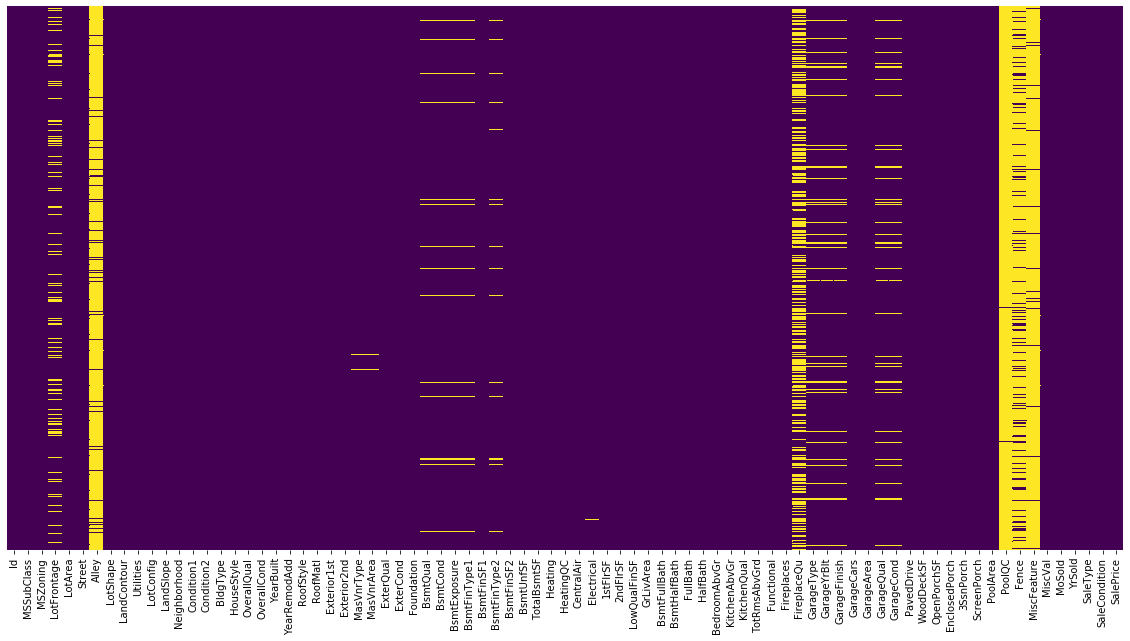

In [21]:
#Plotting Missing values in each column:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(house_pred.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#Printing Missing Percentages
pd.options.display.max_rows = None
print(missing_percentages.sort_values(ascending = False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

<font size = 5 color = blue> **Inference:** </font>    

- In house_pred df, 20 columns have missing values. 
<br>

- **Highest Missing value columns are:** 'PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'
<br>    
   

- **Lowest Missing value columns are:** 'GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2',
'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical'

In [23]:
#Drop the columns having more than 30% missing values.
house_pred = house_pred.drop(house_pred.loc[:,list(missing_percentages> 30)].columns,1)

In [24]:
#Missing Percentages after dropping huge missing valued columns:
mis_perc2 = round(100*(house_pred.isnull().sum()/len(house_pred.index)),2)
mis_perc2.sort_values(ascending = False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

<font size = 5 color = Brown> Plotting Missing Values on Categorical fields: </font>


In [25]:
#List of Categorical fields:
house_pred_cat = house_pred.select_dtypes('object')
cat_cols = list(house_pred_cat.columns)
print(type(cat_cols))
cat_cols

<class 'list'>


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

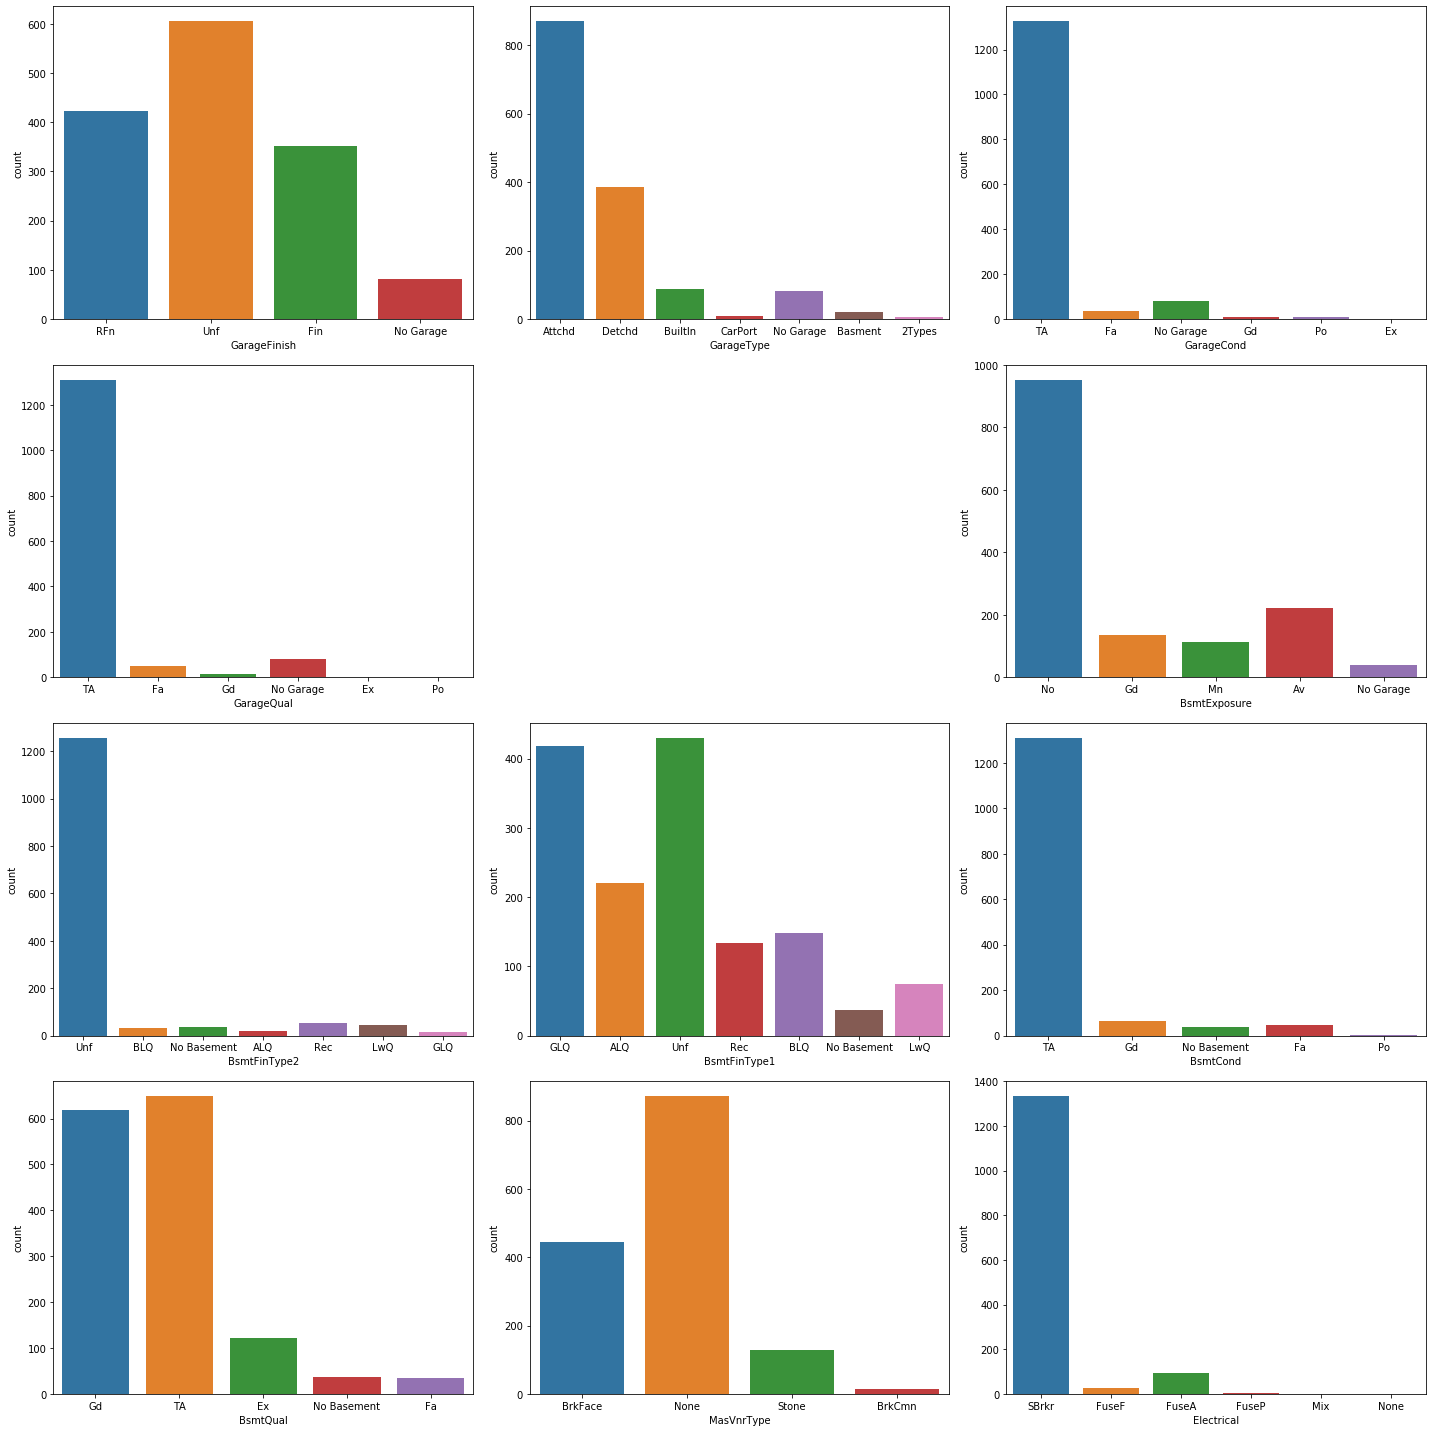

In [26]:
#Plotting Missing Categorical fields only:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(20,20))

gs=GridSpec(4,3) # 4 rows, 3 columns
ax1=fig.add_subplot(gs[0,0]) # First row, first column
sns.countplot(house_pred['GarageFinish'].replace(np.nan, 'No Garage')) 
ax2=fig.add_subplot(gs[0,1]) # First row, second column
sns.countplot(house_pred['GarageType'].replace(np.nan, 'No Garage')) 
ax3=fig.add_subplot(gs[0,2]) # First row, thrid column
sns.countplot(house_pred['GarageCond'].replace(np.nan, 'No Garage')) 
ax4=fig.add_subplot(gs[1,0]) # second row, first column
sns.countplot(house_pred['GarageQual'].replace(np.nan, 'No Garage')) 
ax6=fig.add_subplot(gs[1,2]) 
sns.countplot(house_pred['BsmtExposure'].replace(np.nan, 'No Garage')) 
ax7=fig.add_subplot(gs[2,0]) # Third row, first column
sns.countplot(house_pred['BsmtFinType2'].replace(np.nan, 'No Basement')) 
ax8=fig.add_subplot(gs[2,1])
sns.countplot(house_pred['BsmtFinType1'].replace(np.nan, 'No Basement')) 
ax9 = fig.add_subplot(gs[2,2]) 
sns.countplot(house_pred['BsmtCond'].replace(np.nan, 'No Basement')) 
ax10=fig.add_subplot(gs[3,0]) # 4th row
sns.countplot(house_pred['BsmtQual'].replace(np.nan, 'No Basement')) 
ax11=fig.add_subplot(gs[3,1]) 
sns.countplot(house_pred['MasVnrType'].replace(np.nan, 'None'))
ax11=fig.add_subplot(gs[3,2]) 
sns.countplot(house_pred['Electrical'].replace(np.nan, 'None')) 
plt.tight_layout()

<font size = 5 color = Blue> Inference: </font>

    1. In Garage Categories missing values ('No Garage') are around 100.
    2. In Basement Categories missing values ('No Basements') are less in number.
    3. For MasVnrType have most missing values.
    4. For Electrical category from the plot we can't find any missing values but there are some(0.07%).


<font color=Brown size =5> Imputing Missing Data: </font>

In [27]:
#cols=['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']

house_pred['GarageFinish'].fillna('No Garage', inplace = True)

house_pred['GarageType'].fillna('No Garage',inplace = True)

house_pred['GarageCond'].fillna('No Garage',inplace = True)

house_pred['GarageQual'].fillna('No Garage',inplace = True)

house_pred['BsmtExposure'].fillna('No Basement',inplace = True)

house_pred['BsmtFinType2'].fillna('No Basement',inplace = True)

house_pred['BsmtFinType1'].fillna('No Basement',inplace = True)

house_pred['BsmtCond'].fillna('No Basement',inplace = True)

house_pred['BsmtQual'].fillna('No Basement',inplace = True)

house_pred['MasVnrType'].fillna('None',inplace = True)



In [28]:
#Shape after some columns drop:
house_pred.shape

(1460, 76)

In [29]:
#Missing Percentages after dropping huge missing valued columns:
mis_perc3 = round(100*(house_pred.isnull().sum()/len(house_pred.index)),2)
mis_perc3.sort_values(ascending = False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
ExterQual         0.00
Foundation        0.00
YearRemodAdd      0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
RoofStyle         0.00
OverallCond       0.00
YearBuilt         0.00
BsmtUnfSF         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtFinSF2        0.00
TotalBsmtSF       0.00
SaleCondition     0.00
Heating           0.00
GarageCars        0.00
GarageArea 

In [30]:
#Dropped only the row which have missing value
house_pred.dropna(subset=['Electrical'],inplace=True)


<font size = 5 color = Brown> Plotting & Imputing Missing Values on Numerical fields: </font>


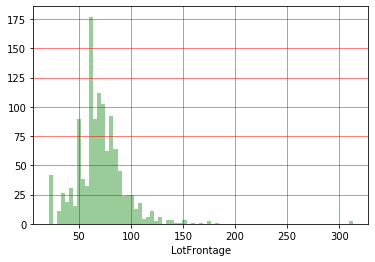

In [33]:
#Plotting 'LotFrontage' Distrbution:
plt.grid(color='red', linestyle='-', linewidth=0.5)
sns.distplot(house_pred['LotFrontage'].dropna(),kde=False,color='green',bins = 75)

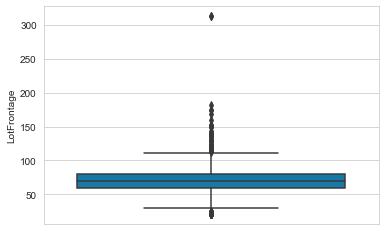

In [34]:
#Boxplot to find out the range of LotFrontage:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(y='LotFrontage',data=house_pred,palette='winter')

In [35]:
#Replacing missing with 70 feet.
house_pred['LotFrontage'].fillna(70,inplace = True)

<font size = 5 color = Blue> Inference: </font>
> From the above two graphs we can depict that most data lies at 70 feet range. So we imputed with the same.

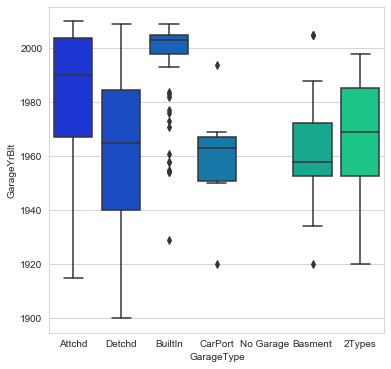

In [36]:
#Boxplot for GarageYrBlt
sns.set_style('whitegrid')
plt.figure(figsize = (6,6))
sns.boxplot(x='GarageType',y='GarageYrBlt',data=house_pred,palette='winter')

In [37]:
#Replacing GarageYrBlt with 0 
house_pred['GarageYrBlt'].fillna(0,inplace = True)

<font size = 5 color = Blue> Inference: </font>
> From the above graph we can depict that missing values are nothing but houses with No Garage. 
 So we imputed with the same.

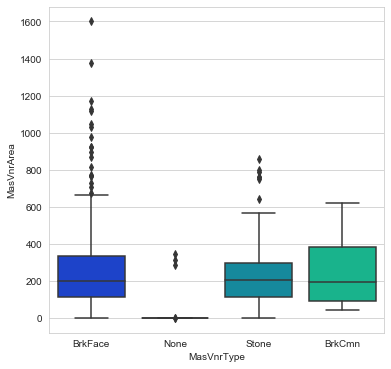

In [38]:
#Boxplot for MasVnrArea:
sns.set_style('whitegrid')
plt.figure(figsize = (6,6))
sns.boxplot(x='MasVnrType',y='MasVnrArea',data=house_pred,palette='winter')

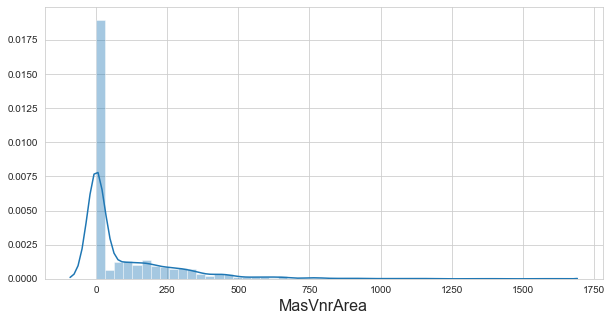

In [39]:
#
plt.figure(figsize=(10,5));
plt.xlabel('xlabel', fontsize=16);
plt.rc('xtick', labelsize=14); 
plt.rc('ytick', labelsize=14); 
sns.distplot(house_pred['MasVnrArea'].dropna());

In [40]:
#Replacing GarageYrBlt with 0 
house_pred.drop('MasVnrArea', axis=1, inplace=True)

<font size = 5 color = Blue> Inference: </font>
>From the above graphs we can depict that this column have High skewness as well as missing values.So dropped it.

In [41]:
#house_pred['MasVnrArea'].fillna(200,inplace = True)
house_pred.shape

(1459, 75)

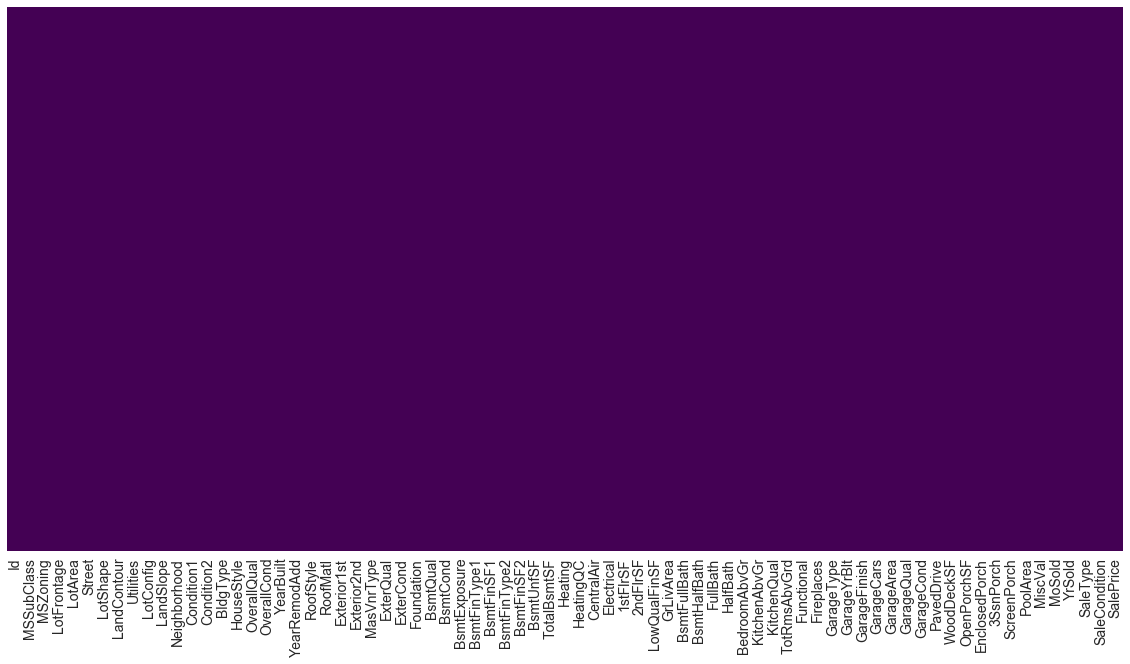

In [42]:
#To visualize the null values in columns, if any!
plt.figure(figsize=(20,10))
sns.heatmap(house_pred.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<font size= 5 color = Blue> Inference </font>
> From the above graph now Data doesn't have any NUlls

In [43]:
# Now drop the 'Id' column since it's unnecessary for the prediction process.
house_pred.drop("Id", axis = 1, inplace = True)

In [44]:
#Group the columns based on dtypes:
grouped_hcols = house_pred.columns.to_series().groupby(house_pred.dtypes).groups
grouped_hcols

{dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', '

In [45]:
house_pred_int = house_pred.select_dtypes(include = ['int64','float64'])
len(house_pred_int.columns)

36

In [46]:
#List of Categorical fields:
house_pred_cat = house_pred.select_dtypes('object')
len(house_pred_cat.columns)

38

<font size= 5 color = Blue> Inference </font>
> Out of 81 columns after data cleaning & Imputation we have 36 Numerical & 38 Categorical Features.

<font color = Skyblue size = 5>EDA: </font>

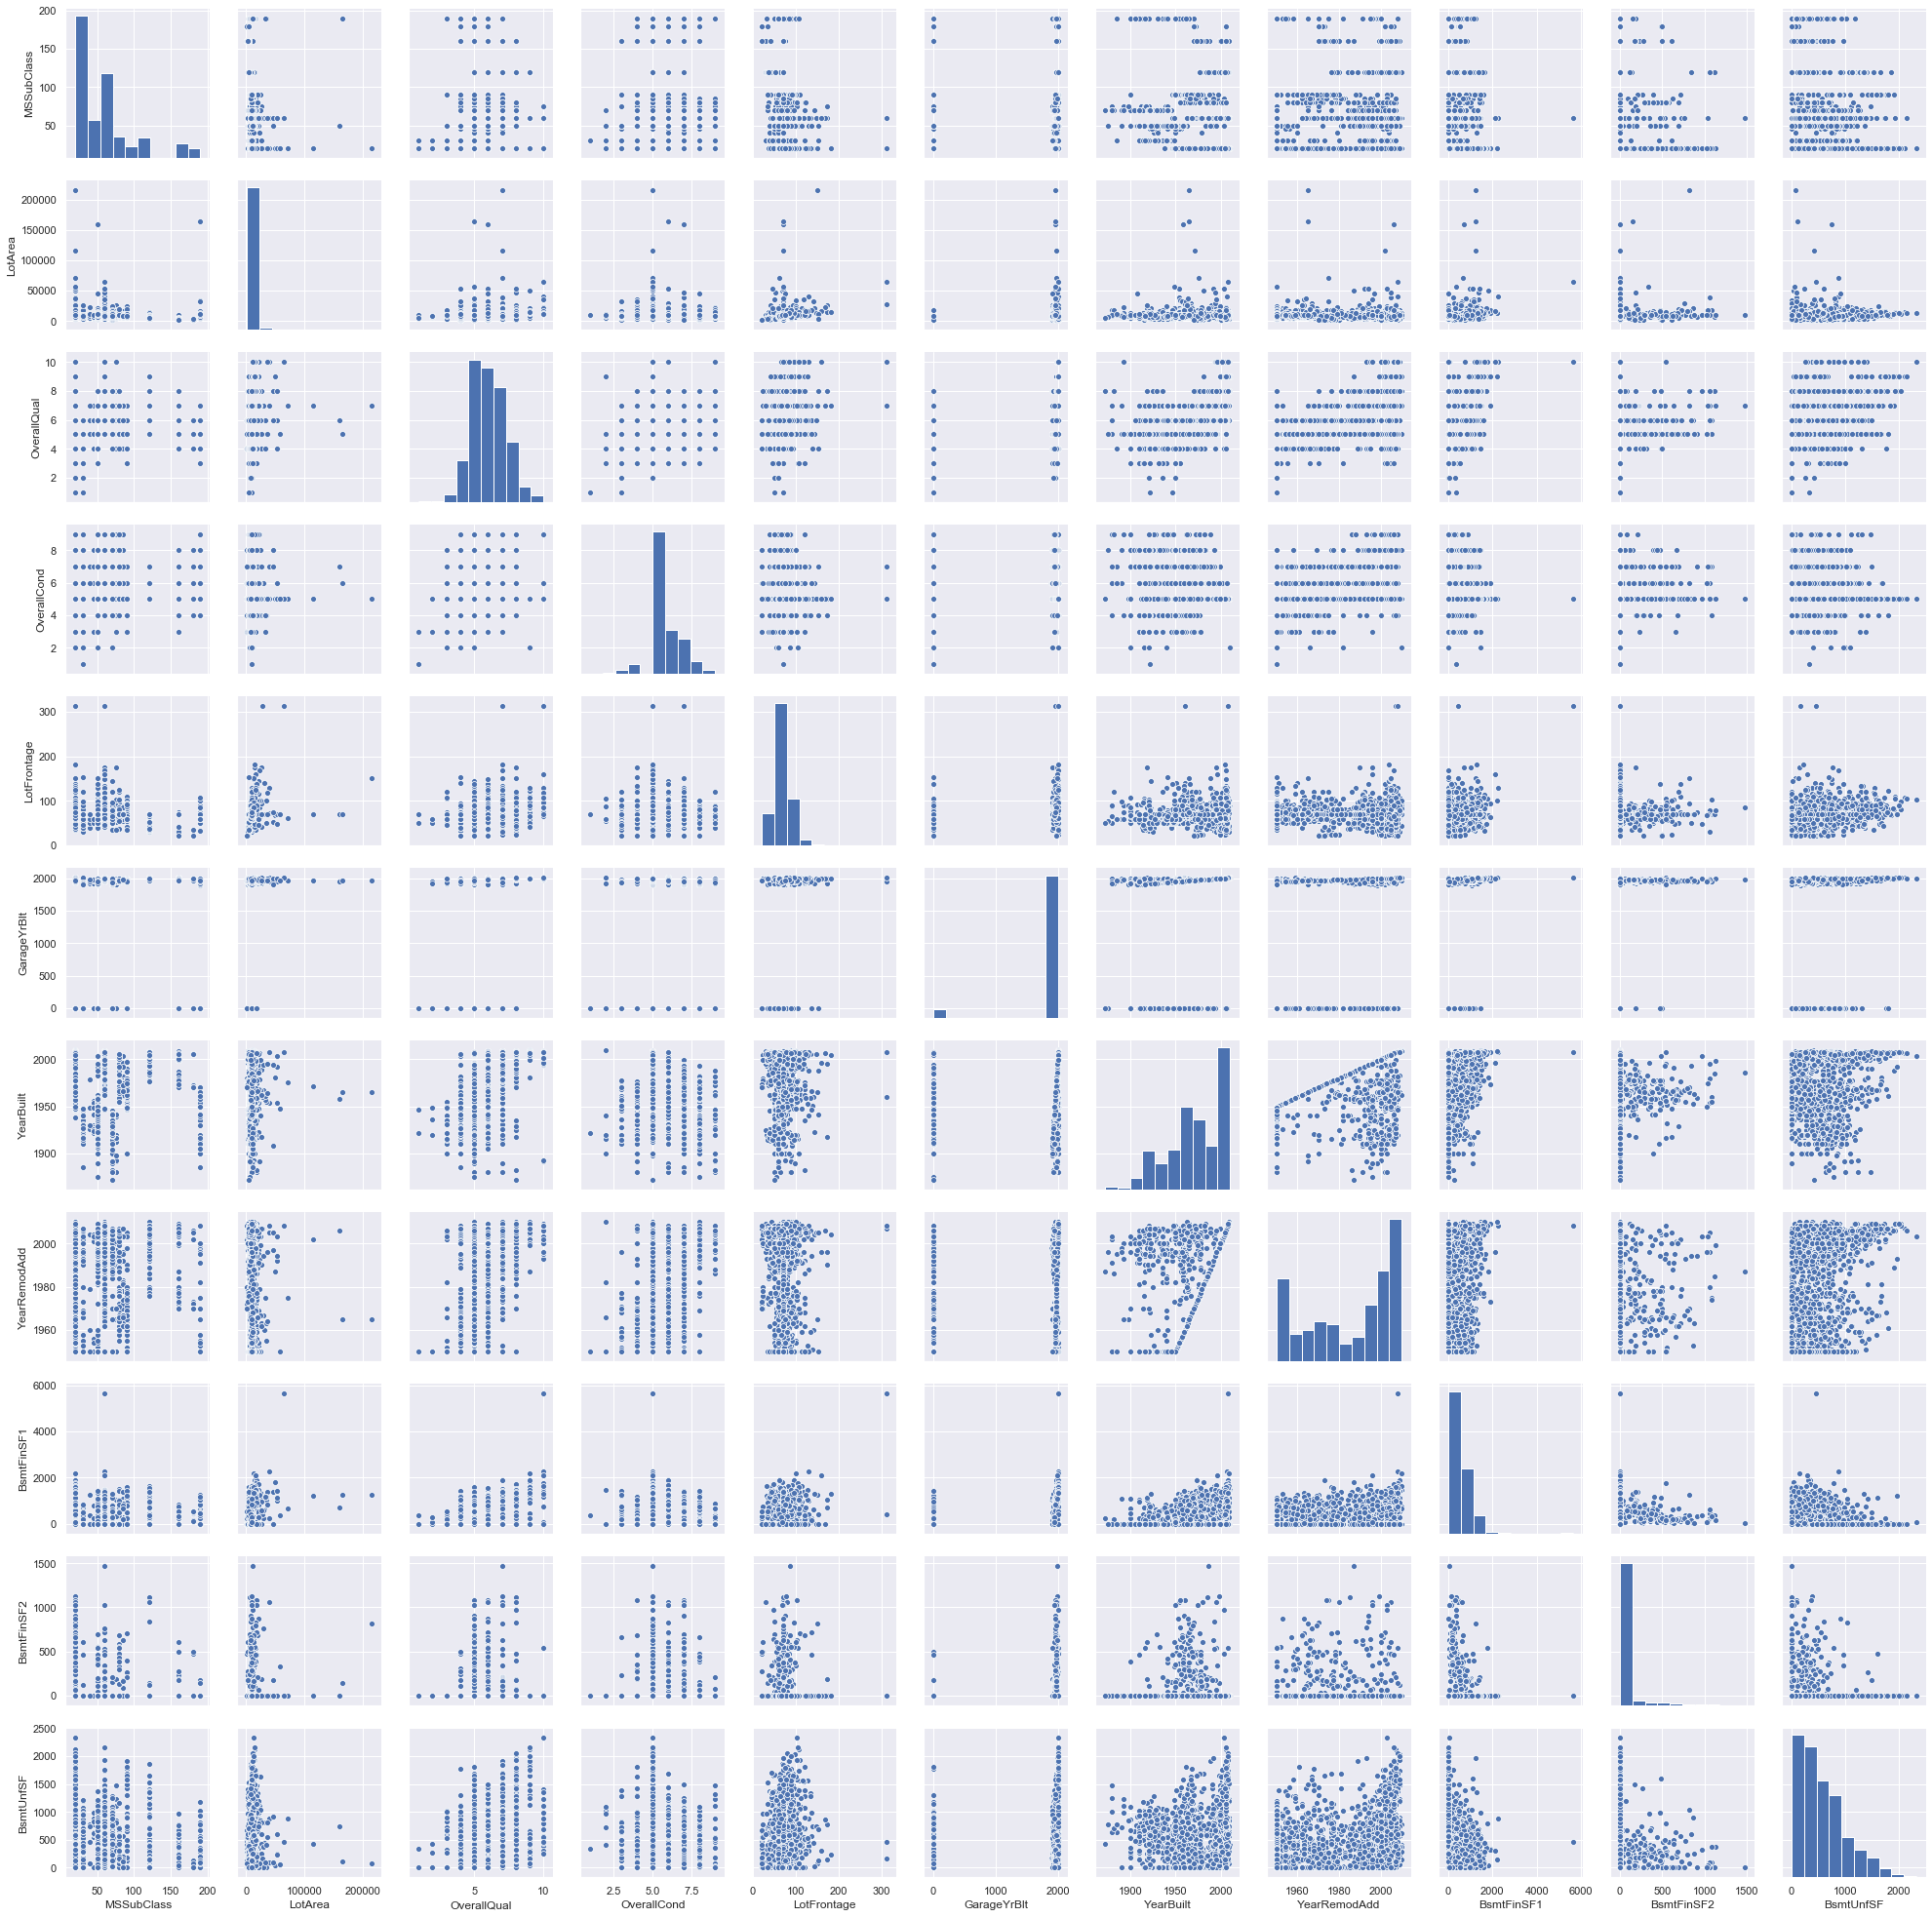

In [47]:
#plotting first few set of the Numerical columns:
sns.set()
cols = ['MSSubClass','LotArea','OverallQual', 'OverallCond','LotFrontage', 'GarageYrBlt',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
sns.pairplot(house_pred_int[cols], size = 2.5)
plt.show();

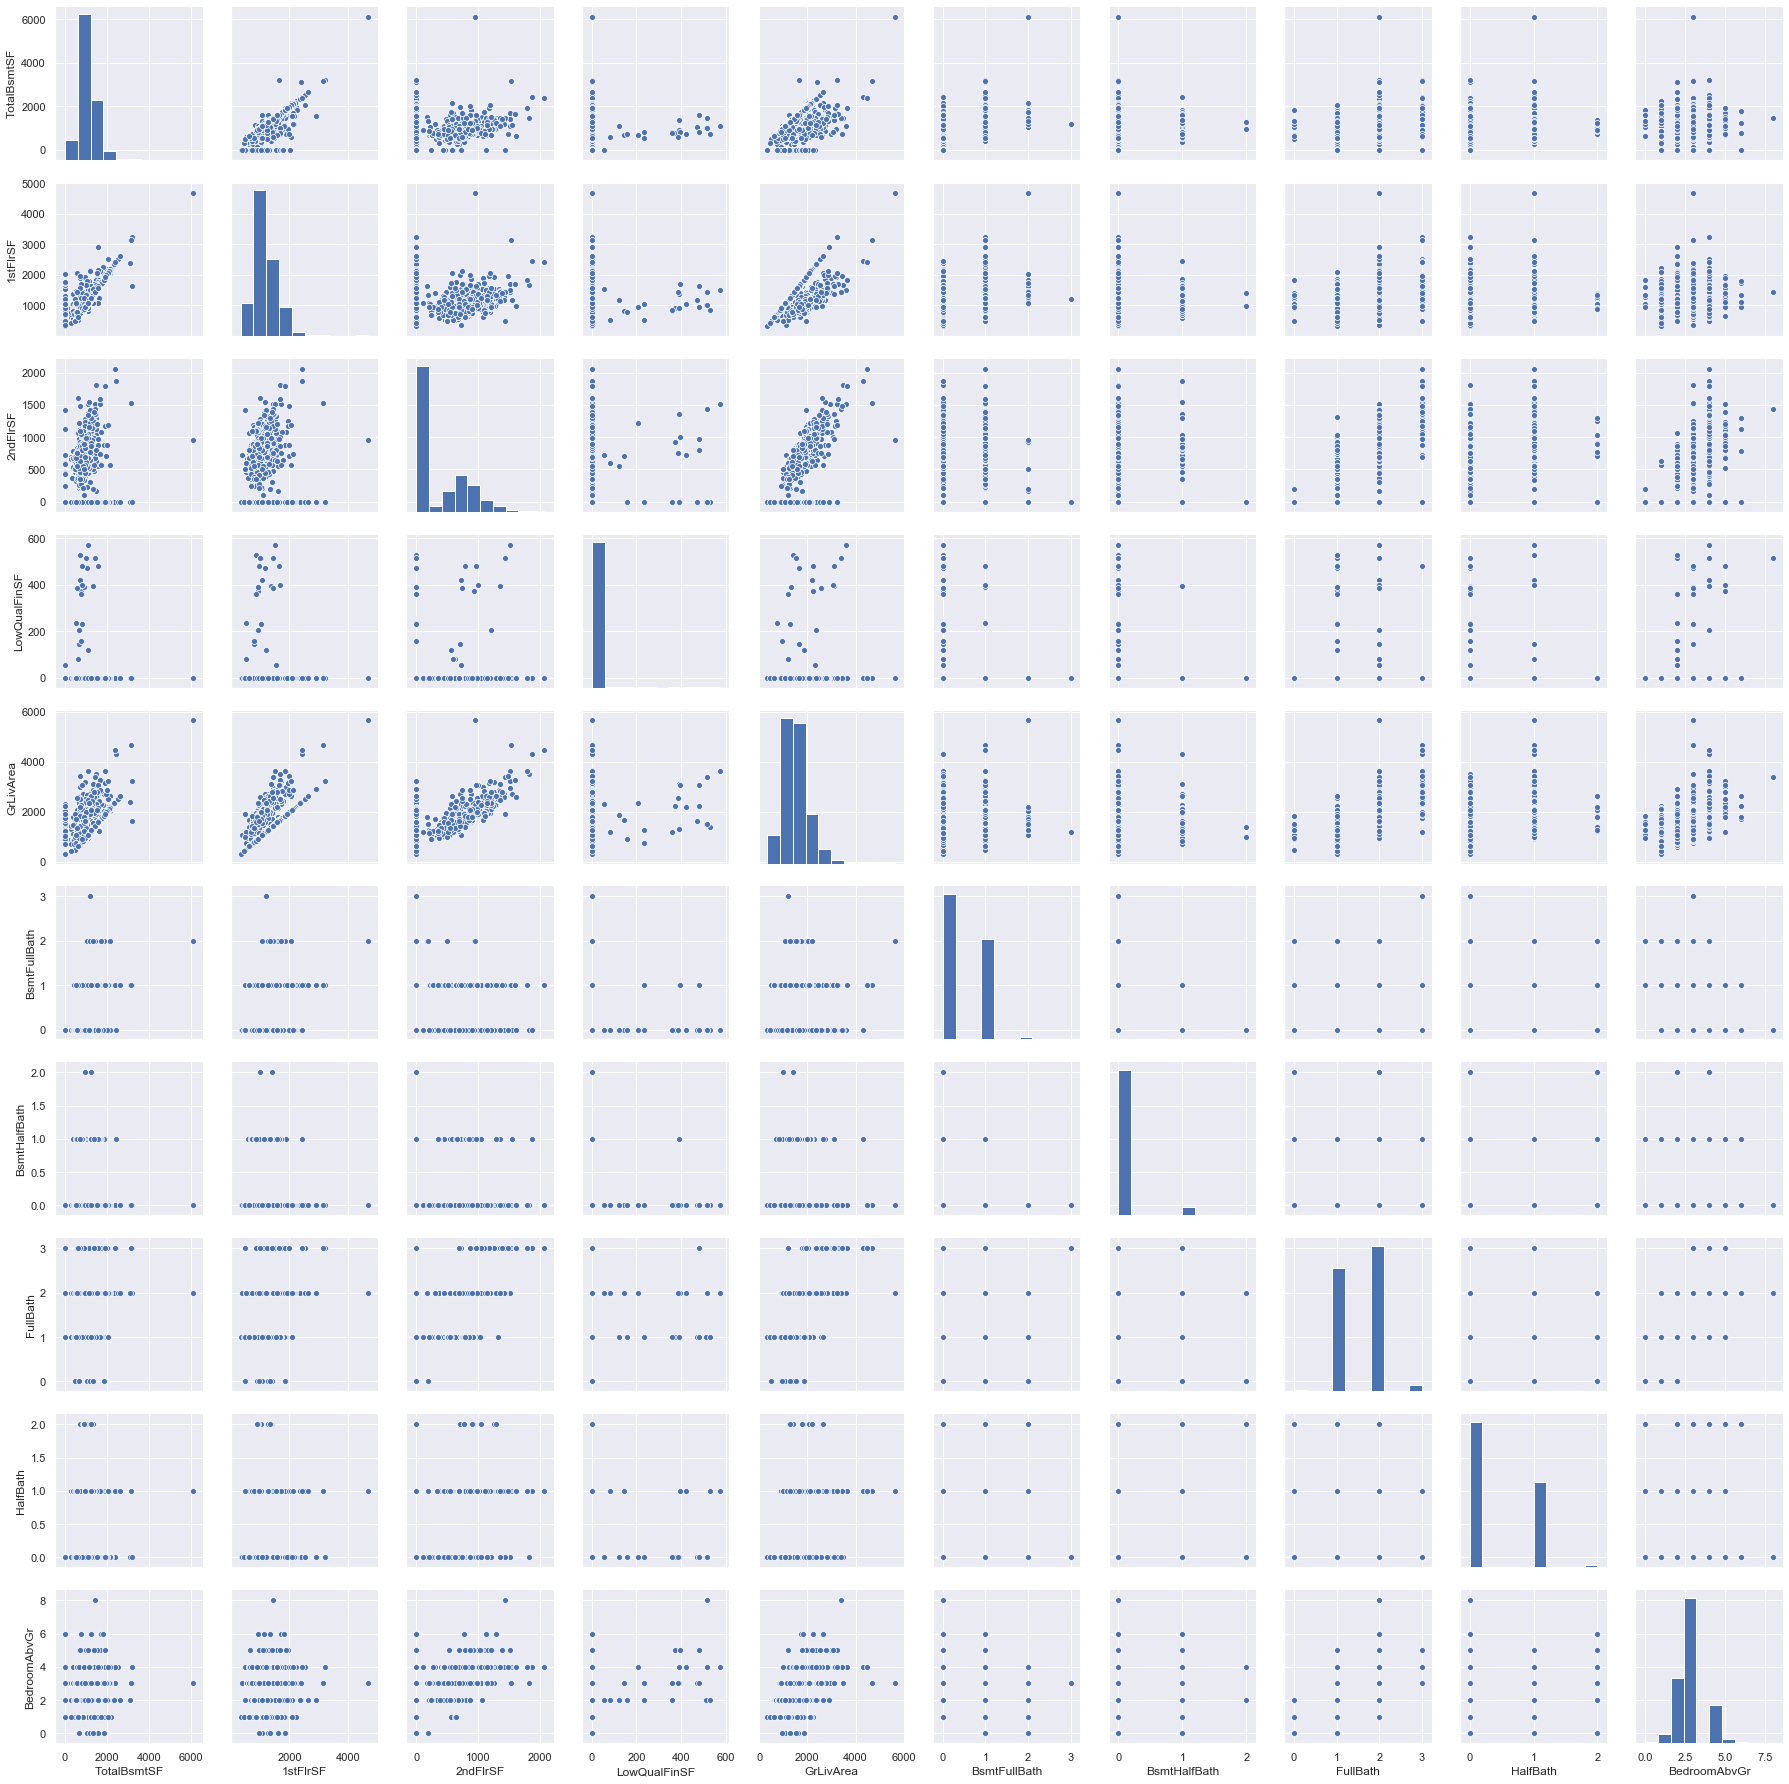

In [48]:
#Second set of Numerical features:
sns.set()
cols = [ 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']
sns.pairplot(house_pred[cols], size = 2.5)
plt.show();

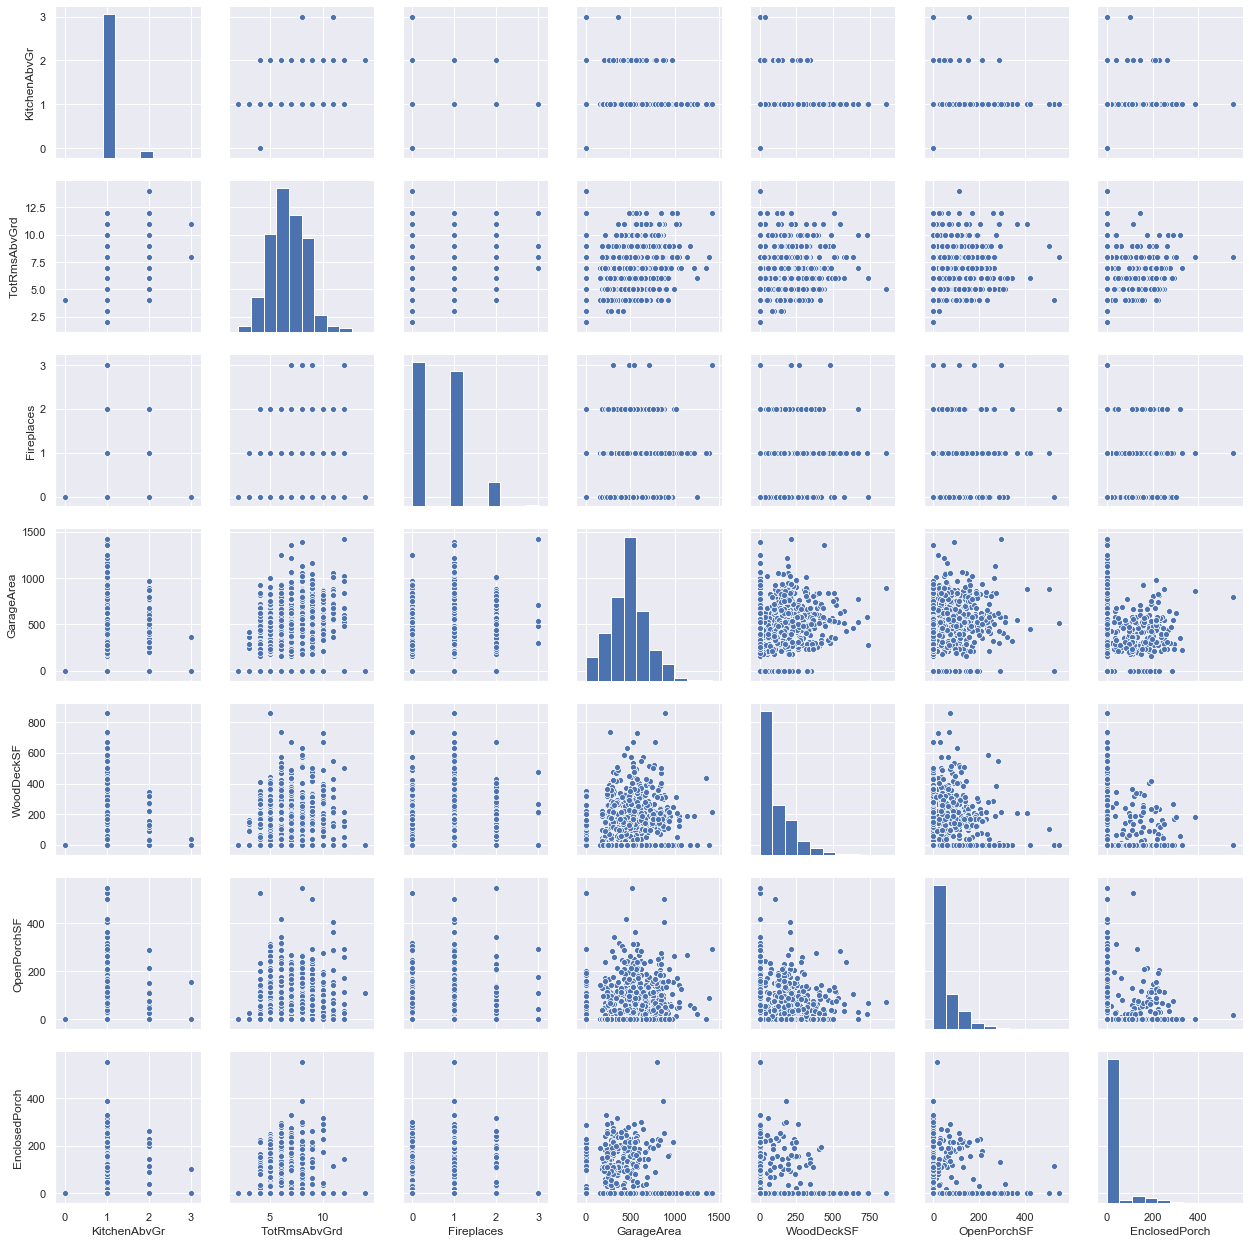

In [49]:
#Third set of Numerical features:
sns.set()
cols = [ 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
sns.pairplot(house_pred[cols], size = 2.5)
plt.show();

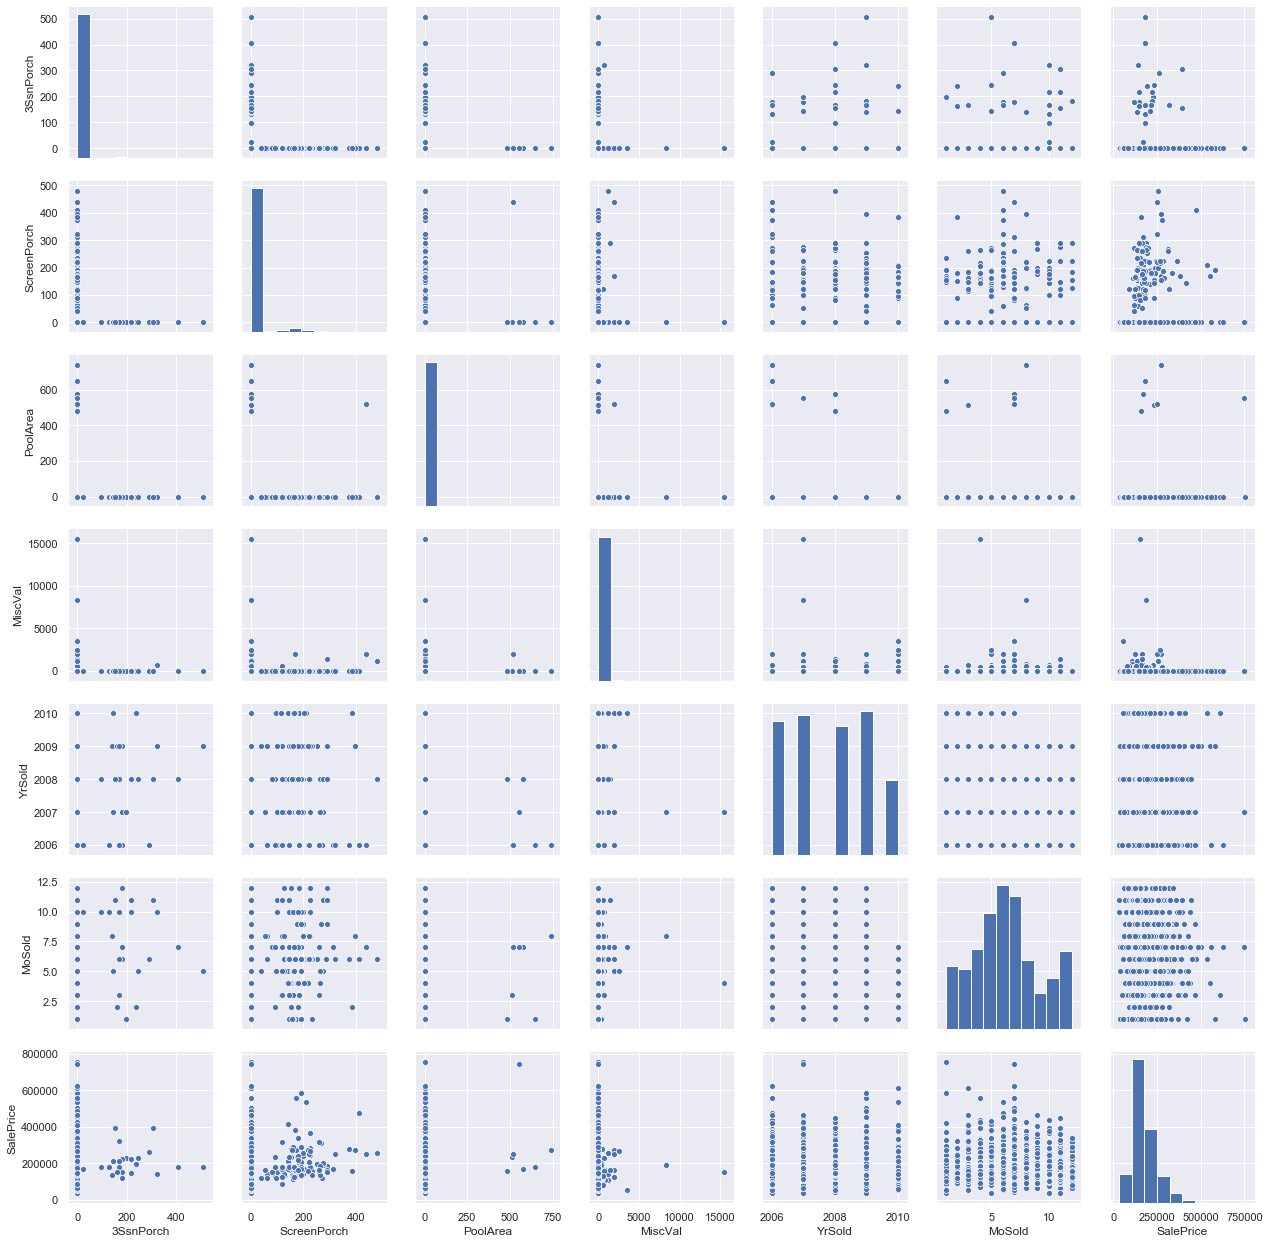

In [50]:
#Rest of the Numerical features
sns.set()
cols = [ '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MoSold','SalePrice']
sns.pairplot(house_pred[cols], size = 2.5)
plt.show();

<font color = blue size =5 > Inference: </font>
> From above Pairplot's we can depict these respective columns from each Graph need to converted into object type:

1. 'MSSubClass','OverallQual', 'OverallCond'
2. 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'
3. 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'
4. None of them are looking like categorical.But if we have YrSold we can drop MoSold.

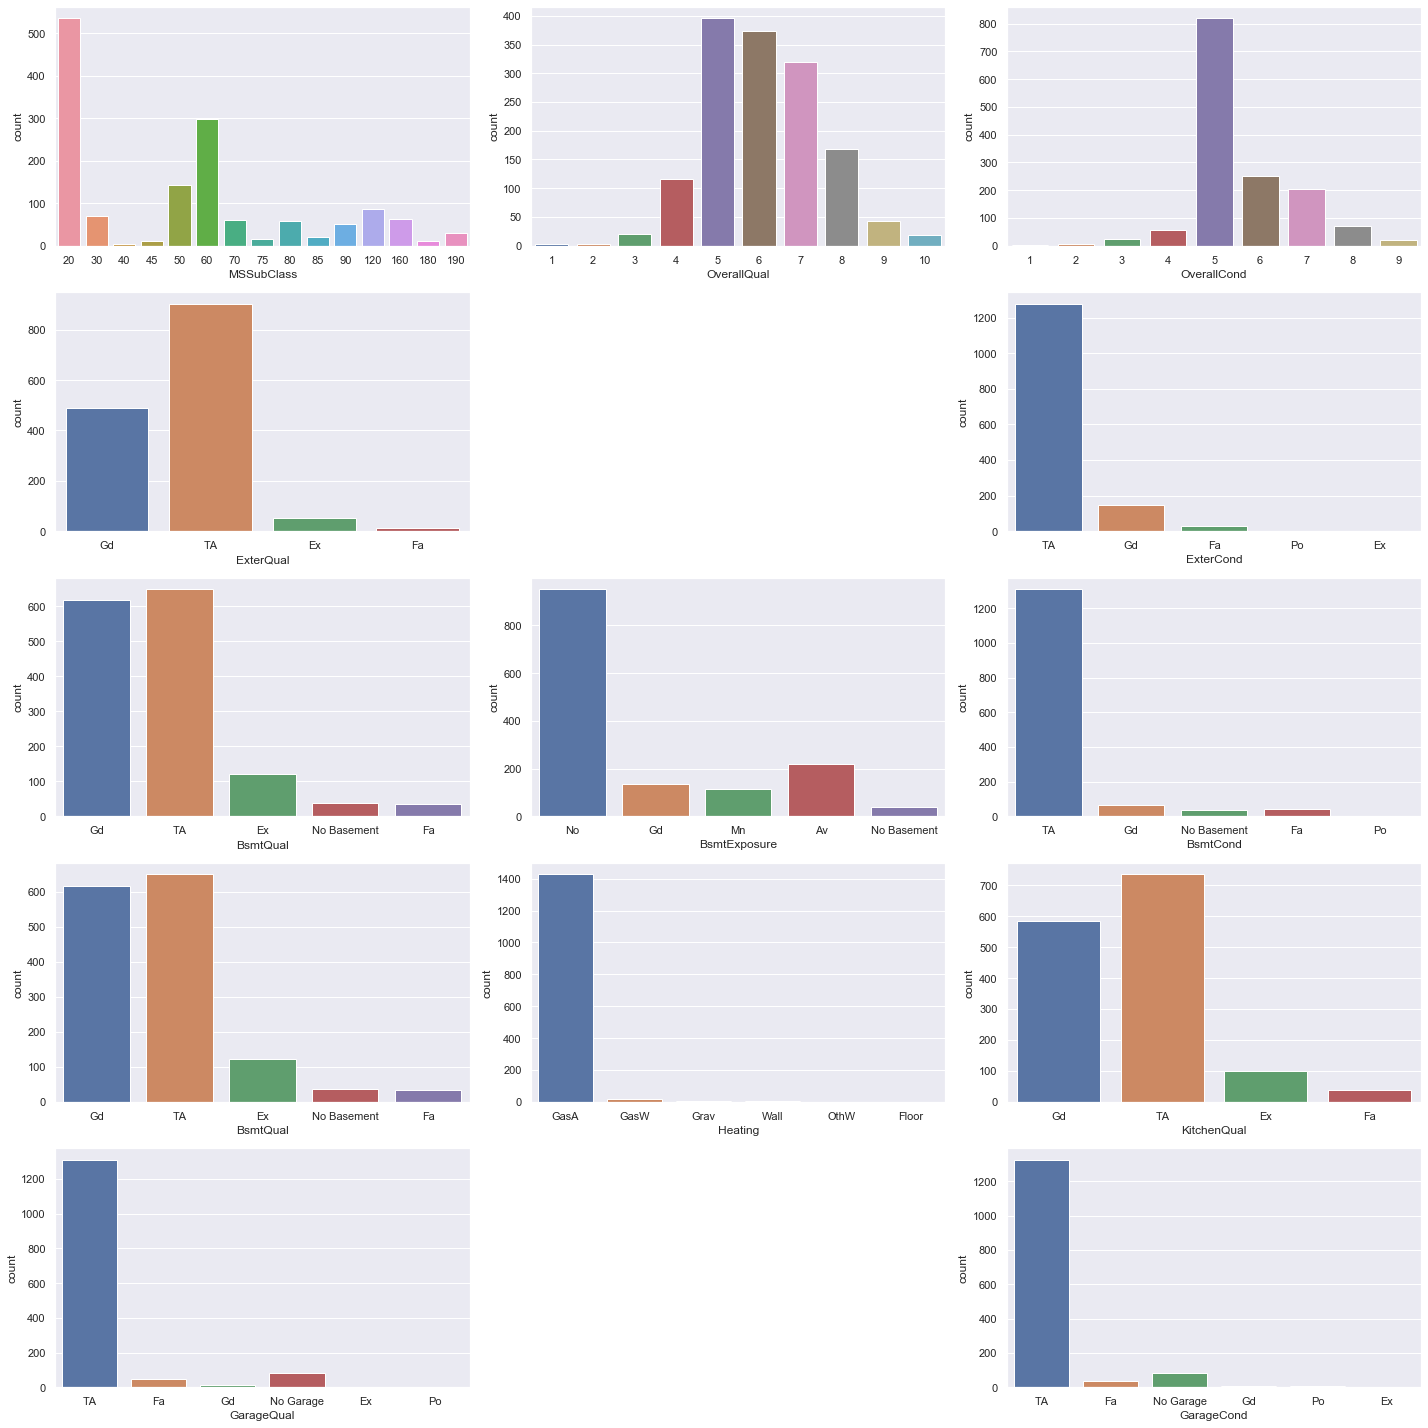

In [51]:
#Few set of Categorical features which need to be imputed:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(20,20))

gs=GridSpec(5,3) # 4 rows, 3 columns
ax1=fig.add_subplot(gs[0,0]) # First row, first column
sns.countplot(house_pred['MSSubClass']) 
ax2=fig.add_subplot(gs[0,1]) # First row, second column
sns.countplot(house_pred['OverallQual']) 
ax3=fig.add_subplot(gs[0,2]) # First row, thrid column
sns.countplot(house_pred['OverallCond']) 
ax4=fig.add_subplot(gs[1,0])  # second row, first column
sns.countplot(house_pred['ExterQual']) 
ax6=fig.add_subplot(gs[1,2]) 
sns.countplot(house_pred['ExterCond']) 

ax7=fig.add_subplot(gs[2,0]) # Third row, first column
sns.countplot(house_pred['BsmtQual']) 
ax8=fig.add_subplot(gs[2,1])
sns.countplot(house_pred['BsmtExposure']) 
ax9 = fig.add_subplot(gs[2,2]) 
sns.countplot(house_pred['BsmtCond']) 

ax10=fig.add_subplot(gs[3,0]) # 4th roww, first column
sns.countplot(house_pred['BsmtQual']) 
ax11=fig.add_subplot(gs[3,1]) 
sns.countplot(house_pred['Heating'])
ax12=fig.add_subplot(gs[3,2]) 
sns.countplot(house_pred['KitchenQual']) 

ax13=fig.add_subplot(gs[4,0]) #5th roww, first column
sns.countplot(house_pred['GarageQual']) 
ax14=fig.add_subplot(gs[4,2]) 
sns.countplot(house_pred['GarageCond']) 

plt.tight_layout()

In [52]:
#Trying to reduce No.of sub categories from 10 to 3 (for below features):
house_pred['OverallQual'].replace({1:1,2:1,3:1,4:1,5:2,6:3,7:3,8:3,9:3,10:3 }, inplace = True)
house_pred['OverallCond'].replace({1:1,2:1,3:1,4:1,5:2,6:3,7:3,8:3,9:3,10:3 }, inplace = True)

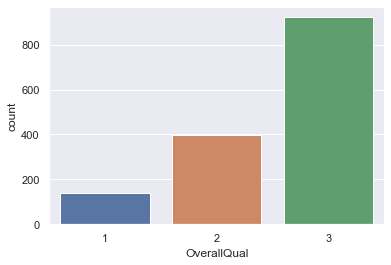

In [53]:
sns.countplot(house_pred['OverallQual']) 


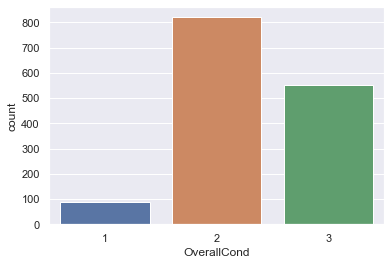

In [54]:
sns.countplot(house_pred['OverallCond'])

In [55]:
# From above Pairplot's we can depict these respective columns from each Graph need to converted into object type:
cols_conv = ['MSSubClass','OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
house_pred[cols_conv] = house_pred[cols_conv].astype('object')

In [56]:
# Now drop the 'Id' column since it's unnecessary for the prediction process.
house_pred.drop("MoSold", axis = 1, inplace = True)

In [57]:
categorical_features = house_pred.select_dtypes(include = ["object"]).columns
numerical_features = house_pred.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
house_pred_num = house_pred[numerical_features]
house_pred_cat = house_pred[categorical_features]

Numerical features : 24
Categorical features : 49


In [58]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [59]:
numerical_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [60]:
len(house_pred.columns)

73

In [61]:
house_pred['SalePrice'].dtype

dtype('int64')

In [62]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
#To handle skewness on Numeric features:
skewness = house_pred_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)


MiscVal          24.443278
PoolArea         14.807992
LotArea          12.190881
3SsnPorch        10.290132
LowQualFinSF      8.998885
BsmtFinSF2        4.249219
ScreenPorch       4.116334
EnclosedPorch     3.085342
LotFrontage       2.383206
OpenPorchSF       2.361099
SalePrice         1.880008
BsmtFinSF1        1.683465
WoodDeckSF        1.539362
TotalBsmtSF       1.525190
1stFlrSF          1.375089
GrLivArea         1.364297
BsmtUnfSF         0.918367
2ndFlrSF          0.813466
GarageArea        0.179081
YrSold            0.096422
GarageCars       -0.341494
YearRemodAdd     -0.502108
YearBuilt        -0.612133
GarageYrBlt      -3.863962
dtype: float64

In [63]:
#Filtering features based on Skewness above 0.8
skewness = skewness[abs(skewness)>0.8]
skewness.index

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [64]:
len(skewness.index)

19

In [65]:
house_pred_cat.shape

(1459, 49)

In [66]:
type(house_pred.nunique())

pandas.core.series.Series

In [67]:
house_pred.nunique().sort_values(ascending=False)

LotArea          1072
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          752
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        98
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
TotRmsAbvGrd       12
SaleType            9
Condition1          9
PoolArea            8
BedroomAbvGr        8
RoofMatl            8
Condition2          8
HouseStyle          8
BsmtFinType2        7
Functional          7
BsmtFinType1        7
GarageType          7
GarageCond          6
RoofStyle           6
GarageQual          6
Foundation          6
Heating             6
SaleCondition       6
LotConfig           5
BsmtExposure        5
BsmtCond  

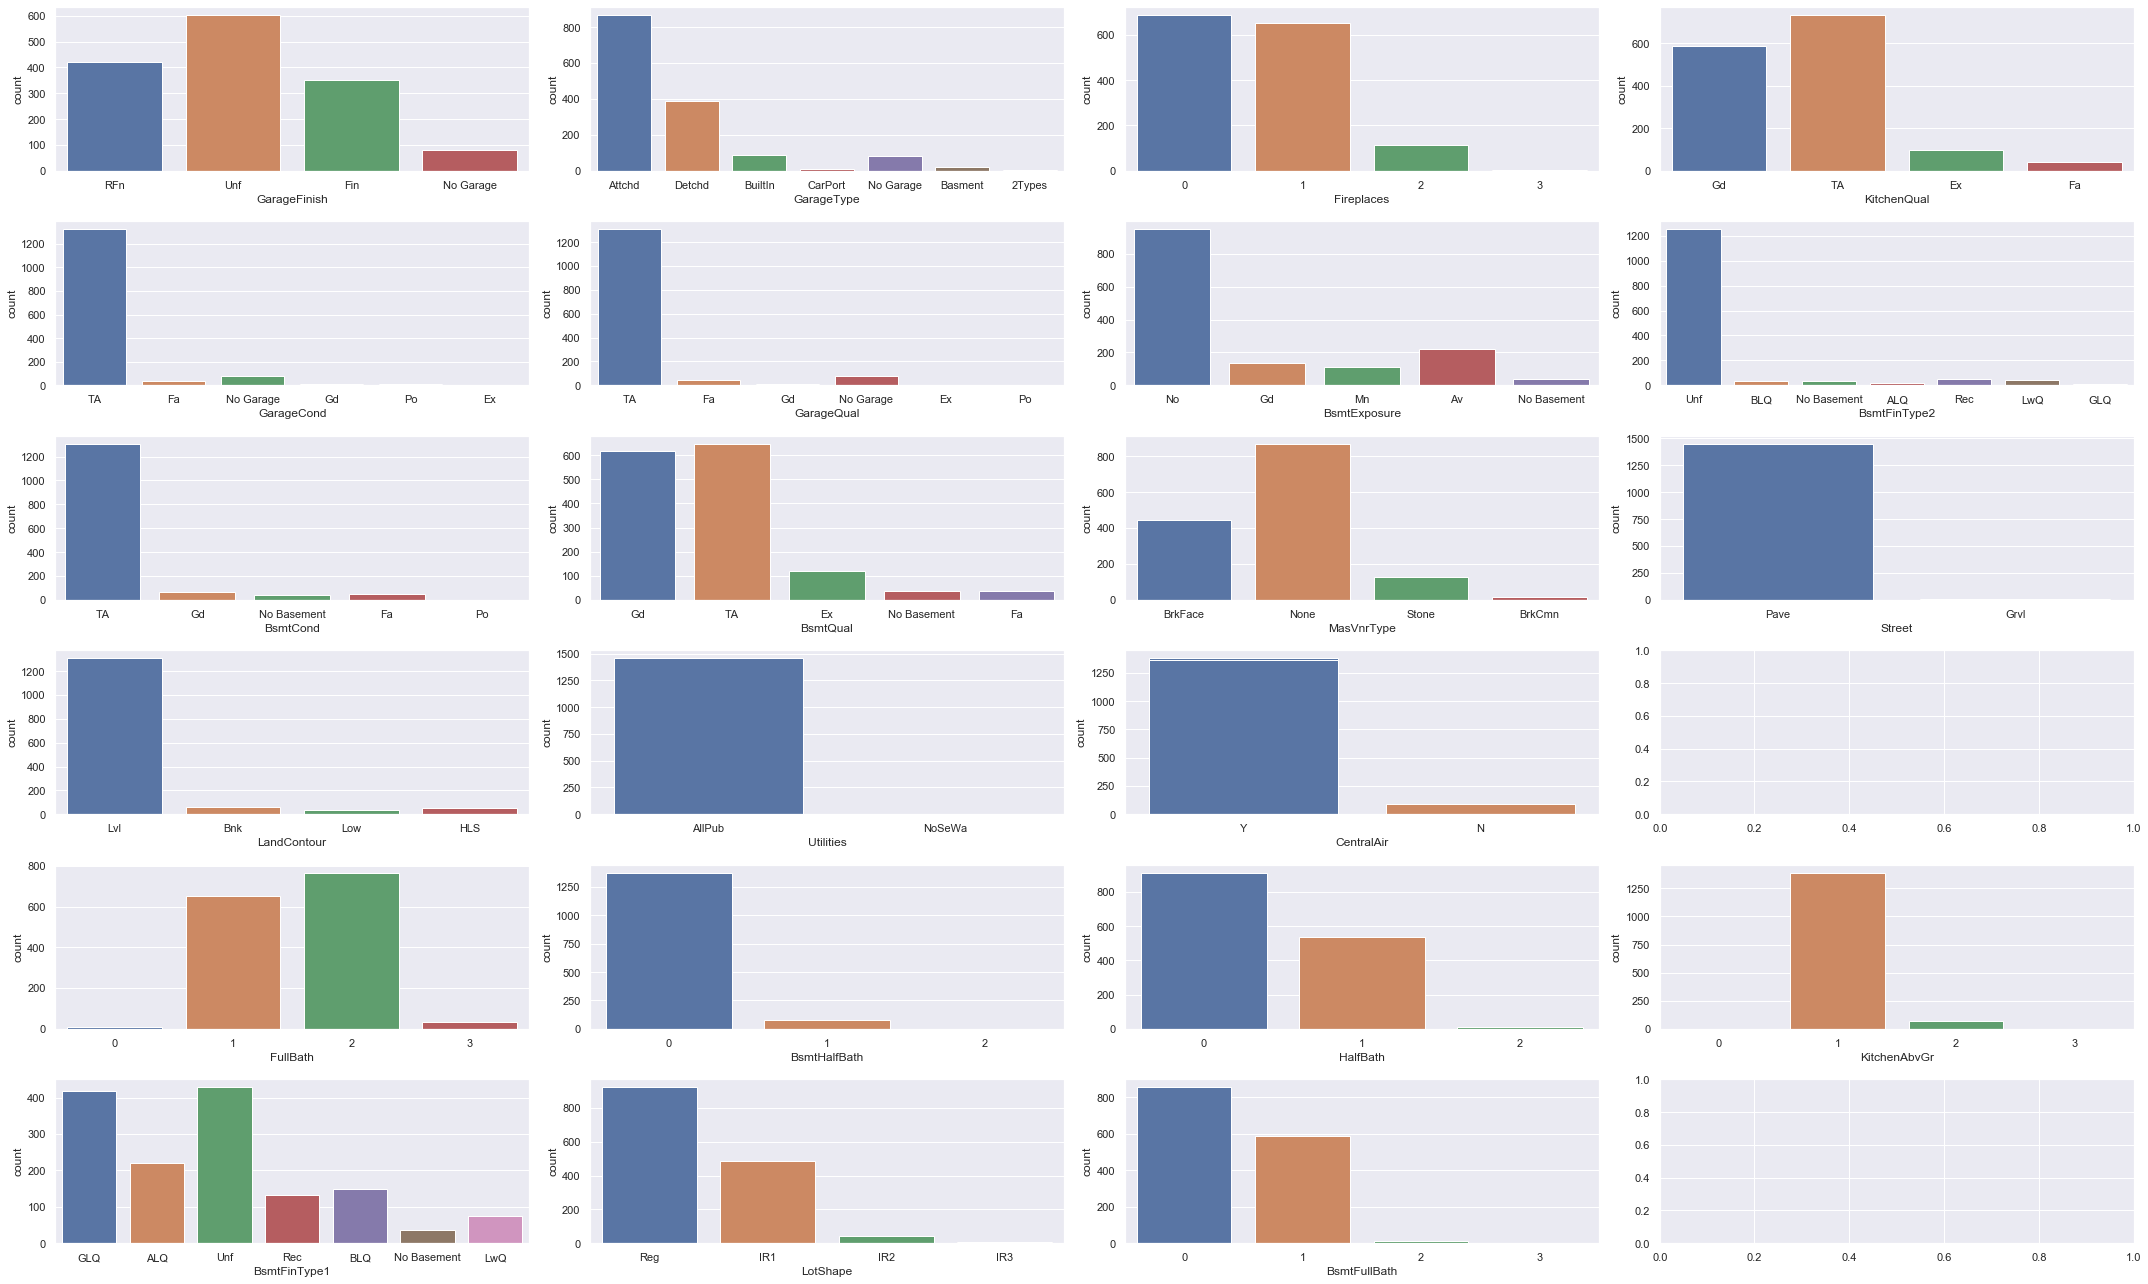

In [68]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(6,4, figsize = (30,18))
plt4 = sns.countplot(house_pred['GarageFinish'], ax = axs[0,0])
plt5 = sns.countplot(house_pred['GarageType'], ax = axs[0,1])
plt26 = sns.countplot(house_pred['Fireplaces'], ax = axs[0,2])
plt25 = sns.countplot(house_pred['KitchenQual'], ax = axs[0,3])

plt6 = sns.countplot(house_pred['GarageCond'], ax = axs[1,0])
plt7 = sns.countplot(house_pred['GarageQual'], ax = axs[1,1])
plt8 = sns.countplot(house_pred['BsmtExposure'], ax = axs[1,2])
plt9 = sns.countplot(house_pred['BsmtFinType2'], ax = axs[1,3])


plt11 = sns.countplot(house_pred['BsmtCond'], ax = axs[2,0])
plt12 = sns.countplot(house_pred['BsmtQual'], ax = axs[2,1])
plt13 = sns.countplot(house_pred['MasVnrType'], ax = axs[2,2])
plt14 = sns.countplot(house_pred['Street'], ax = axs[2,3])

plt16 = sns.countplot(house_pred['LandContour'], ax = axs[3,0])
plt17 = sns.countplot(house_pred['Utilities'], ax = axs[3,1])
plt18 = sns.countplot(house_pred['LandSlope'], ax = axs[3,2])
plt19 = sns.countplot(house_pred['CentralAir'], ax = axs[3,2])


plt21 = sns.countplot(house_pred['FullBath'], ax = axs[4,0])
plt22 = sns.countplot(house_pred['BsmtHalfBath'], ax = axs[4,1])
plt23 = sns.countplot(house_pred['HalfBath'], ax = axs[4,2])
plt24= sns.countplot(house_pred['KitchenAbvGr'], ax = axs[4,3])



plt10 = sns.countplot(house_pred['BsmtFinType1'], ax = axs[5,0])
plt15 = sns.countplot(house_pred['LotShape'], ax = axs[5,1])
plt20 = sns.countplot(house_pred['BsmtFullBath'], ax = axs[5,2])

plt.tight_layout()

In [69]:
# Checking unique values:
print(house_pred['Street'].value_counts())
print(house_pred['LotShape'].value_counts())
print(house_pred['LandContour'].value_counts())
print(house_pred['Utilities'].value_counts())
print(house_pred['LandSlope'].value_counts())
print(house_pred['MasVnrType'].value_counts())
print(house_pred['ExterQual'].value_counts())
print(house_pred['BsmtQual'].value_counts())
print(house_pred['BsmtCond'].value_counts())
print(house_pred['BsmtExposure'].value_counts())
print(house_pred['CentralAir'].value_counts())
print(house_pred['BsmtFullBath'].value_counts())
print(house_pred['BsmtHalfBath'].value_counts())
print(house_pred['FullBath'].value_counts())
print(house_pred['HalfBath'].value_counts())
print(house_pred['KitchenAbvGr'].value_counts())
print(house_pred['KitchenQual'].value_counts())
print(house_pred['Fireplaces'].value_counts())
print(house_pred['GarageFinish'].value_counts())
print(house_pred['PavedDrive'].value_counts())



Pave    1453
Grvl       6
Name: Street, dtype: int64
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64
None       871
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA    905
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA             649
Gd             617
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
TA             1310
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
No             952
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
Y    1364
N      95
Name: CentralAir, dtype: int64
0    855
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1

In [70]:
# Dropping columns that are highly skewed:
house_pred.drop(['Street','LandContour','Utilities','LandSlope','BsmtCond','CentralAir','BsmtHalfBath','KitchenAbvGr','PavedDrive'],inplace=True,axis=1)

In [71]:
house_pred.shape

(1459, 64)

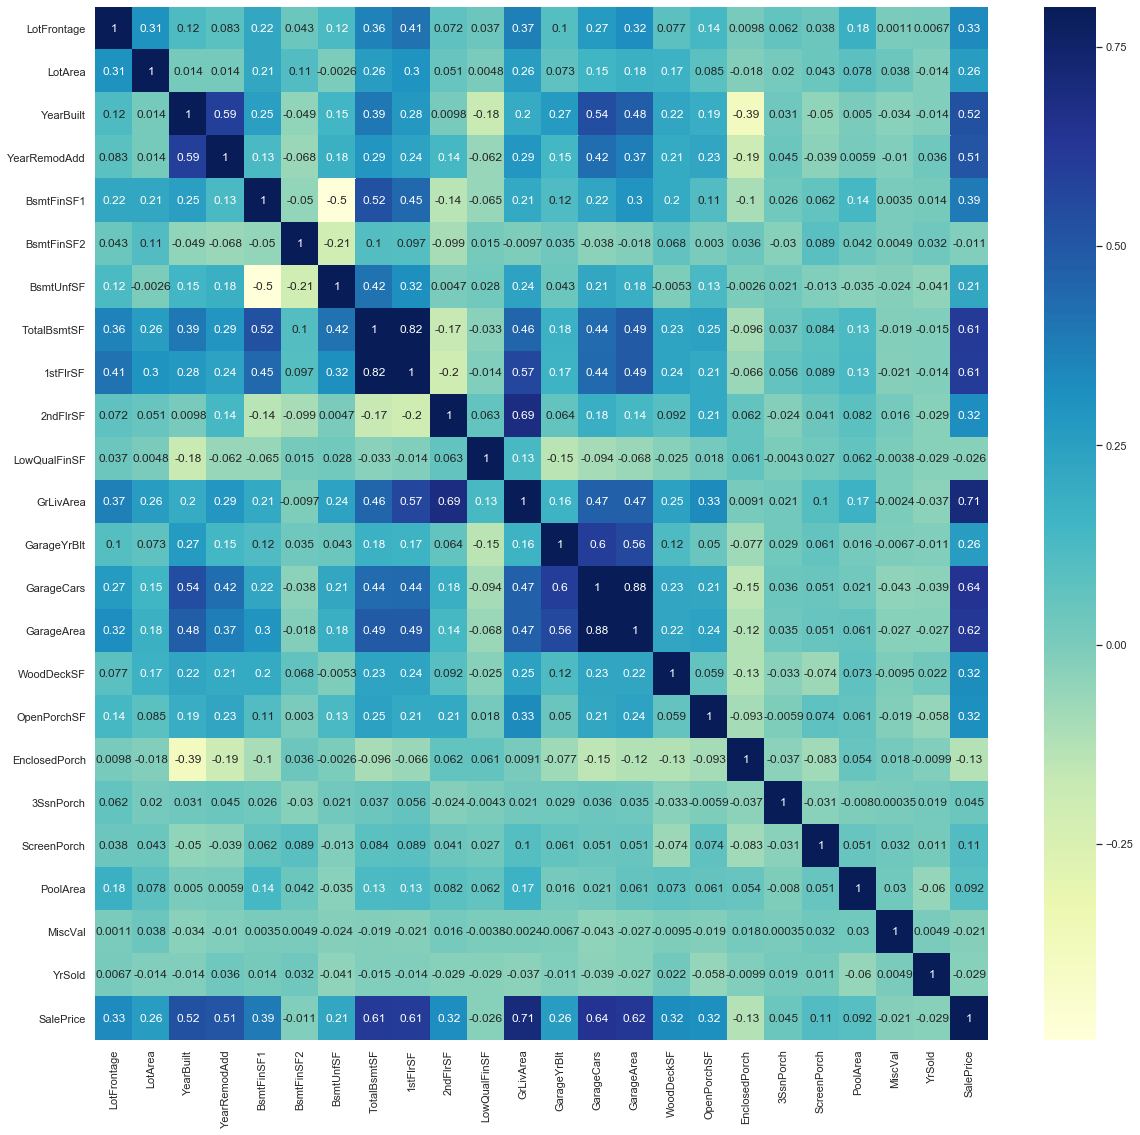

In [72]:
#correlation matrix
corr_all = house_pred.corr()
f, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(corr_all, vmax=.8, annot=True,cmap="YlGnBu");

<font color = Blue size= 5> Inference     </font>
<br>

Multicollinearity observed between:

. GarageArea & GarageCars

. 1stFloorSF & TotalBsmtSF

It is very difficult to get much more correlated features. So we will see most correlated w.r.to SalePrice next

<font color = skyBlue size= 5>Analyzing Target Feature: </font>

In [73]:
#Most Correlation with SalePrice
corr = house_pred.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
YearBuilt        0.523273
YearRemodAdd     0.507430
BsmtFinSF1       0.386436
LotFrontage      0.334918
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
LotArea          0.263837
GarageYrBlt      0.261413
BsmtUnfSF        0.214446
ScreenPorch      0.111419
PoolArea         0.092397
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
EnclosedPorch   -0.128627
Name: SalePrice, dtype: float64


In [74]:
#Describing House SalesPrice:
house_pred['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

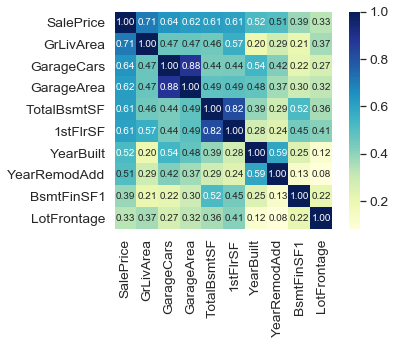

In [75]:
# Lets visualize Top 10 Most correlated features with SalesPrice
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_pred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu")
plt.show()

In [76]:
#Top 10 correlated features with SalePrice
top_corr = pd.DataFrame(cols)
top_corr.columns = ['Top Correlatied Features for SalePrice']
top_corr

Top Correlatied Features for SalePrice
0                              SalePrice
1                              GrLivArea
2                             GarageCars
3                             GarageArea
4                            TotalBsmtSF
5                               1stFlrSF
6                              YearBuilt
7                           YearRemodAdd
8                             BsmtFinSF1
9                            LotFrontage

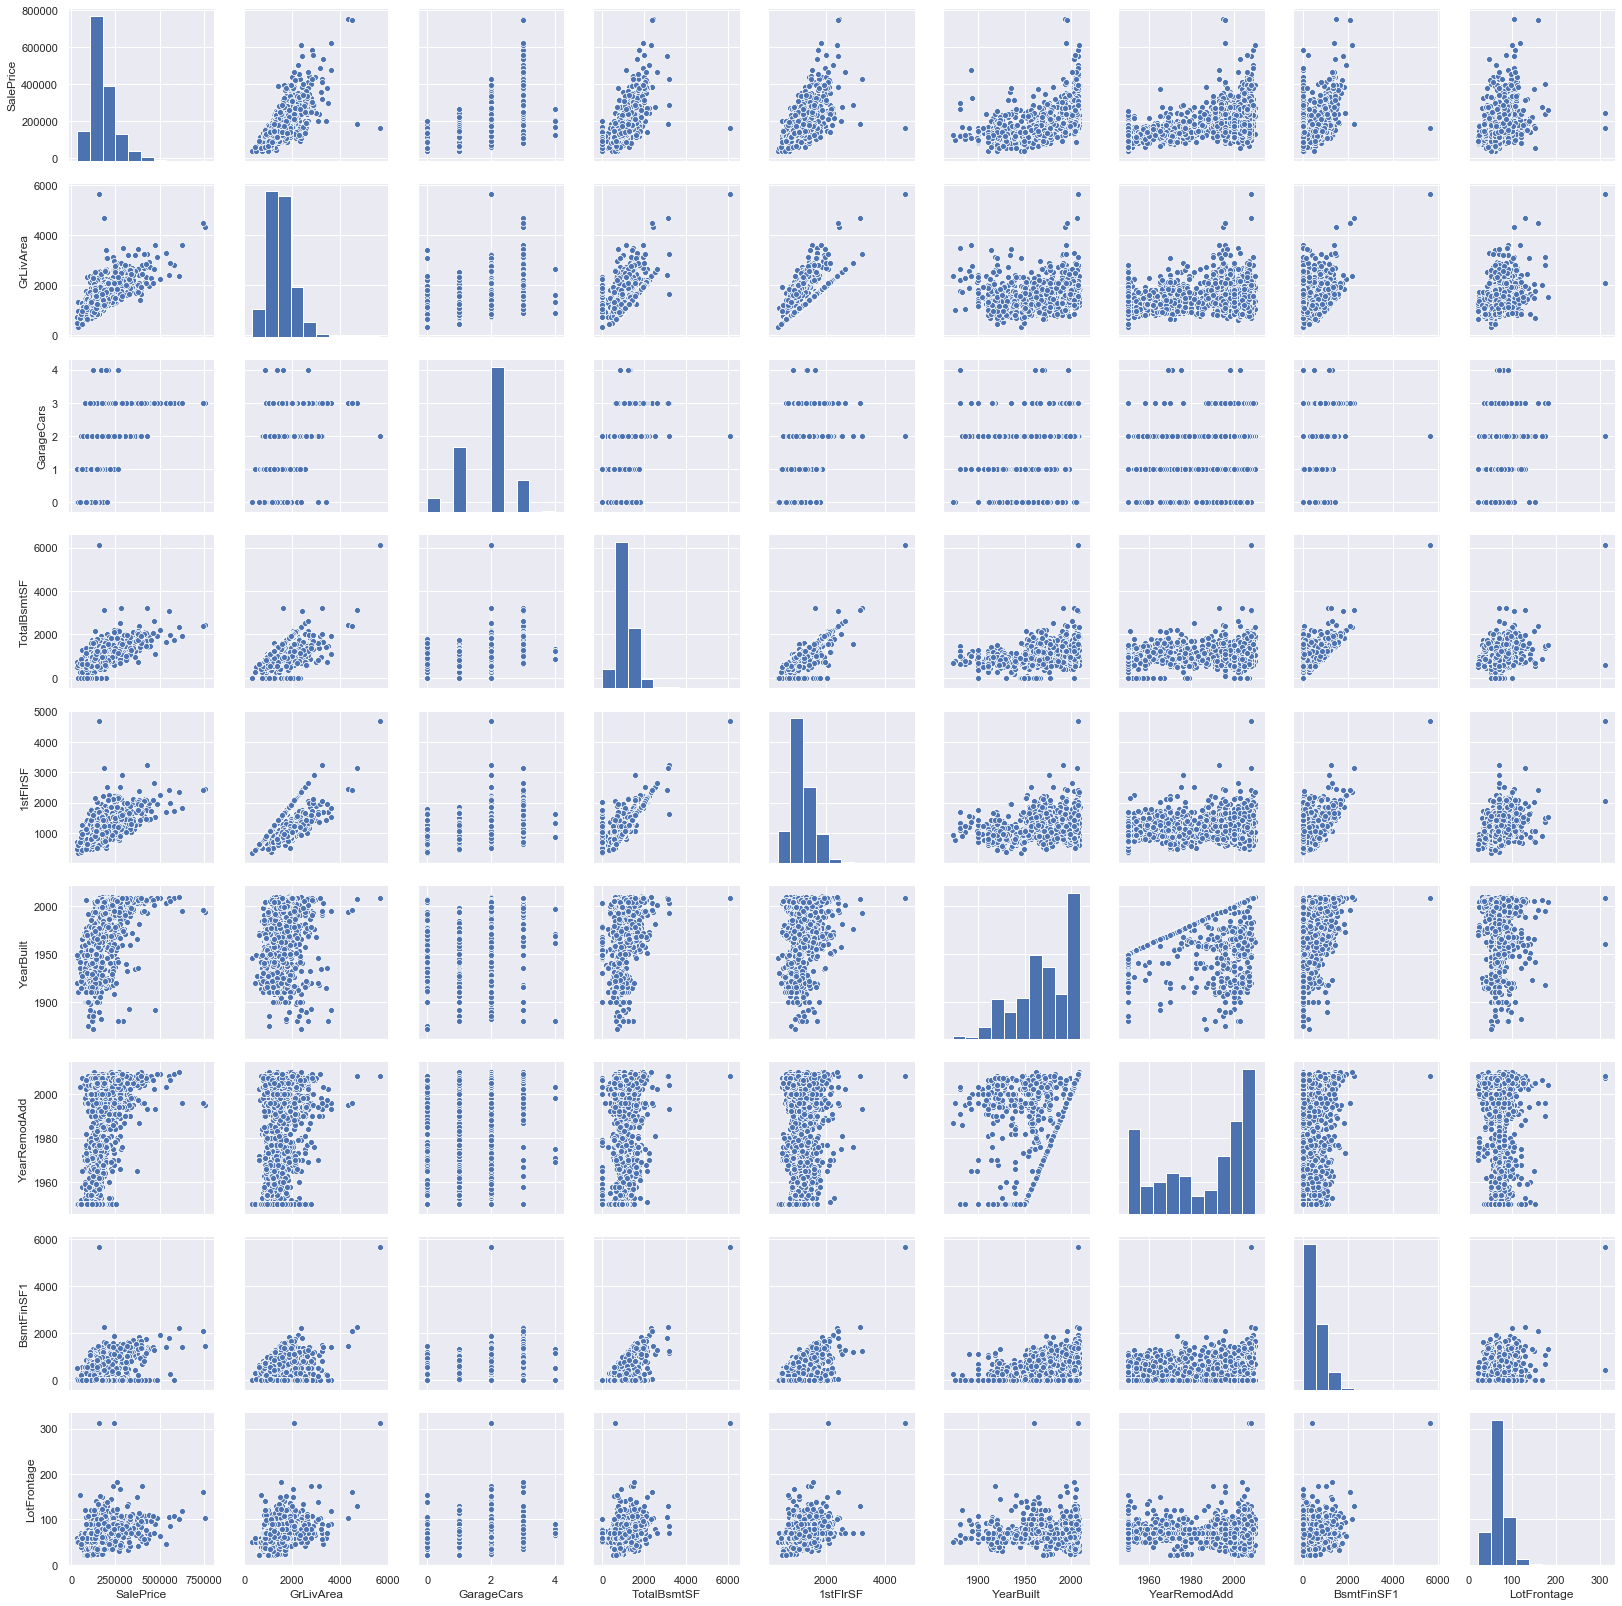

In [77]:
#scatterplot for these top correlated features:
sns.set()
cols = ['SalePrice','GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt','YearRemodAdd','BsmtFinSF1','LotFrontage']
sns.pairplot(house_pred[cols], size = 2.5)
plt.show();

<font size= 5 color = Blue> Inference: </font>

variables most correlated with 'SalePrice':

1. 'GrLivArea' and 'TotalBsmtSF' are strongly correlated.
2. 'GarageCars' and 'GarageArea' are almost same use & difficult to distinguish much among them. 
3. Therefore, we can use 'GarageCars' since its correlation with 'SalePrice' is higher.
4. 'TotalBsmtSF' and '1stFloorSF' & 'BsmtFinSF1' also same. We can keep 'TotalBsmtSF'.
5. 'YearBuilt' and 'YearRemodAdd' also mostly correlated.We can keep 'YearBuilt'
6. 'LotFrontage' also have some correlation.

<font size=5 color =Skyblue>Visualisation w.r.to SalePrice </font>

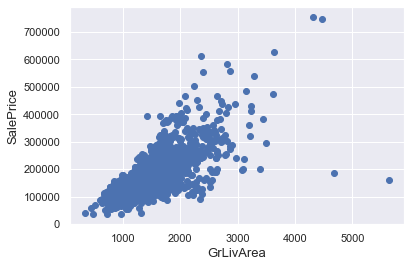

In [78]:
fig, ax = plt.subplots()
ax.scatter(x = house_pred['GrLivArea'], y = house_pred['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<font color = Brown size= 5>Treating Outliers : </font>
> Target relative features outlier treatment

In [79]:
#Treating outliers for GrLivArea
house_pred = house_pred.drop(house_pred[(house_pred['GrLivArea']>4000) & (house_pred['SalePrice']<300000)].index).reset_index(drop=True)


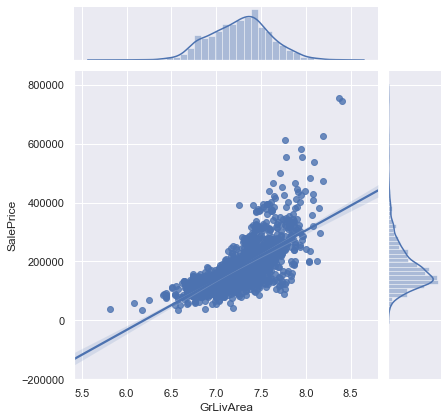

In [80]:
#Only Plotting (No ) by applying log transformation on 'GrLivArea' w.r.to SalePrice
sns.jointplot(x=np.log(house_pred['GrLivArea']), y = house_pred['SalePrice'],kind='reg')

In [81]:
# Checking there is no log transformation on 'GrLivArea'.
house_pred['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
11      2324
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
30      1317
31      1228
32      1234
33      1700
34      1561
35      2452
36      1097
37      1297
38      1057
39      1152
40      1324
41      1328
42       884
43       938
44      1150
45      1752
46      2149
47      1656
48      1452
49       955
50      1470
51      1176
52       816
53      1842
54      1360
55      1425
56      1739
57      1720
58      2945
59       780
60      1158
61      1111
62      1370
63      1710
64      2034
65      2473
66      2207
67      1479
68       747
69      2287
70      2223
71       845
72      1718
73      1086
74      1605
75       988
76       952

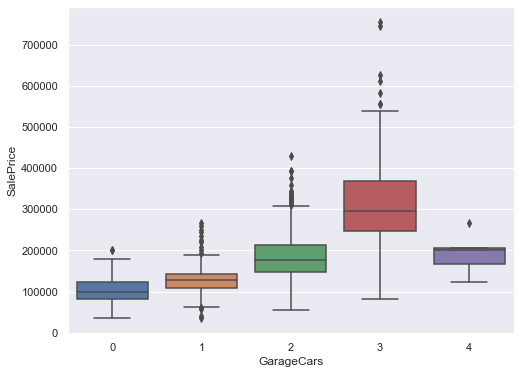

In [82]:
#GarageCars vs SalePrice 
#Plotting How HousePrice can be increased with Quality:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=house_pred['GarageCars'], y = house_pred['SalePrice'])

In [83]:
#Treating of Outliers on observations: 
# More than 4-Cars & SalePrice less than 3 lakhs:

house_pred = house_pred.drop(house_pred[(house_pred['GarageCars'] > 3) & (house_pred['SalePrice']<300000)].index).reset_index(drop=True)

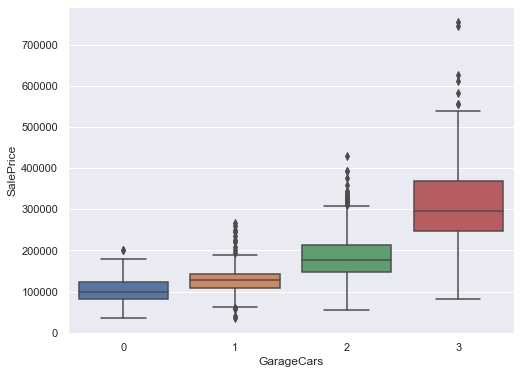

In [84]:
#Plotting GarageCars: 
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=house_pred['GarageCars'], y = house_pred['SalePrice'])

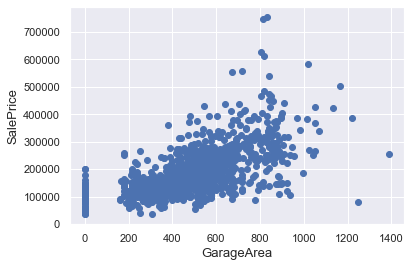

In [85]:
fig, ax = plt.subplots()
ax.scatter(x = house_pred['GarageArea'], y = house_pred['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

In [86]:
#Treating outliers
house_pred = house_pred.drop(house_pred[(house_pred['GarageArea']>1000) & (house_pred['SalePrice']<300000)].index).reset_index(drop=True)


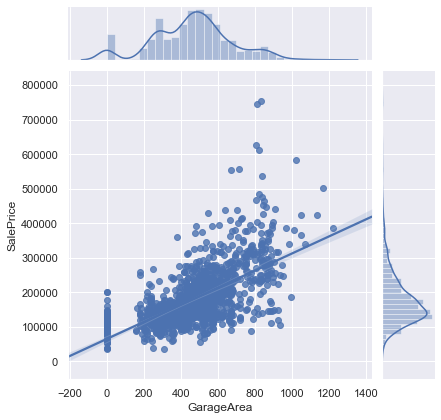

In [87]:
#Jointplot for GarageArea & SalePrice:
sns.jointplot(x=house_pred['GarageArea'], y = house_pred['SalePrice'],kind='reg')

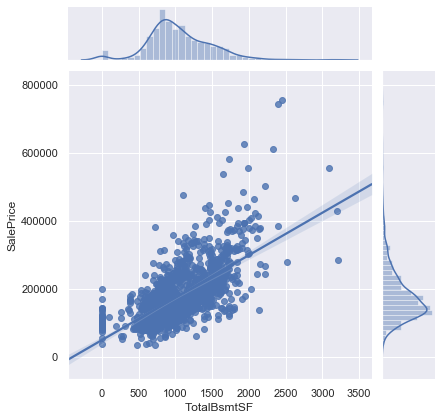

In [88]:
#Plotting Jointplot for'TotalBsmtSF' vs SalePrice:
sns.jointplot(x=house_pred['TotalBsmtSF'], y = house_pred['SalePrice'],kind='reg')

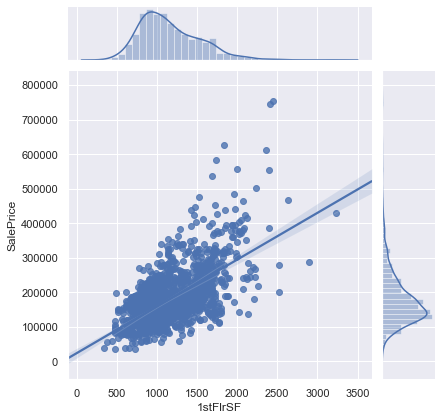

In [89]:
#Plotting Jointplot for '1stFlrSF' vs SalePrice:
sns.jointplot(x=house_pred['1stFlrSF'], y = house_pred['SalePrice'],kind='reg')

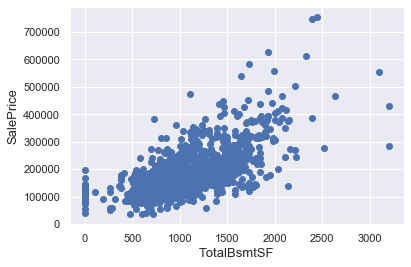

In [90]:
#Plotting Jointplot for 'TotalBsmtSF' vs SalePrice:
fig, ax = plt.subplots()
ax.scatter(x = house_pred['TotalBsmtSF'], y = house_pred['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

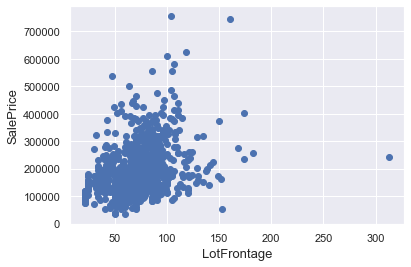

In [91]:
#Plotting Jointplot for 'LotFrontage' vs SalePrice:
fig, ax = plt.subplots()
ax.scatter(x = house_pred['LotFrontage'], y = house_pred['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

In [92]:
#Treating outlier for 'LotFrontage':
house_pred = house_pred.drop(house_pred[(house_pred['LotFrontage']>200) & (house_pred['SalePrice']<300000)].index).reset_index(drop=True)

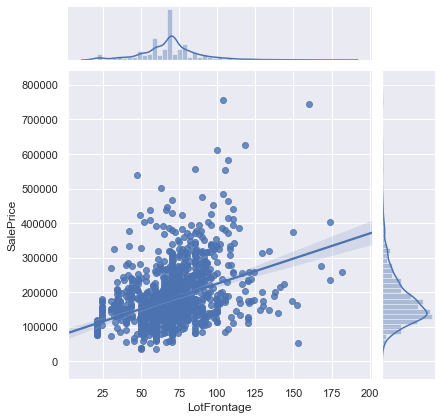

In [93]:
#Plotting Jointplot for 'LotFrontage' & 'SalePrice'
sns.jointplot(x=house_pred['LotFrontage'], y = house_pred['SalePrice'],kind='reg')

<font size = 5 color =skyBlue>Feature Engineering: </font> 

In [94]:
from datetime import date
# Converting year to number of years:
current_year = date.today().year
house_pred['YrSold'] = current_year - house_pred['YrSold']
house_pred['YearBuilt']=current_year-house_pred['YearBuilt']
house_pred['YearRemodAdd']=current_year-house_pred['YearRemodAdd']
house_pred['GarageYrBlt']=current_year-house_pred['GarageYrBlt']

In [95]:
#After converting from actual year to age for 'YrSold':
house_pred['YrSold']

0       12
1       13
2       12
3       14
4       12
5       11
6       13
7       11
8       12
9       12
10      12
11      14
12      12
13      13
14      12
15      13
16      10
17      14
18      12
19      11
20      14
21      13
22      12
23      13
24      10
25      11
26      10
27      10
28      14
29      12
30      12
31      12
32      12
33      10
34      13
35      14
36      11
37      11
38      10
39      12
40      14
41      13
42      13
43      12
44      14
45      10
46      11
47      13
48      11
49      13
50      13
51      14
52      10
53      14
54      13
55      12
56      11
57      14
58      14
59      12
60      14
61      13
62      13
63      10
64      11
65      13
66      10
67      13
68      10
69      14
70      13
71      13
72      11
73      10
74      10
75      11
76      12
77      12
78      10
79      11
80      11
81      14
82      12
83      13
84      11
85      14
86      11
87      11
88      11
89      13
90      14

In [96]:
house_pred.shape

(1446, 64)

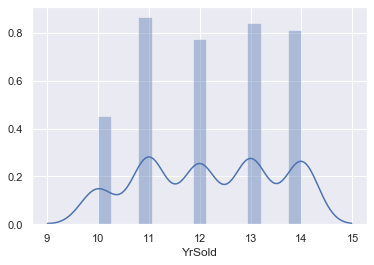

In [97]:
#Plotting 'YrSold' distribution:
sns.distplot( house_pred['YrSold'],bins = 15)

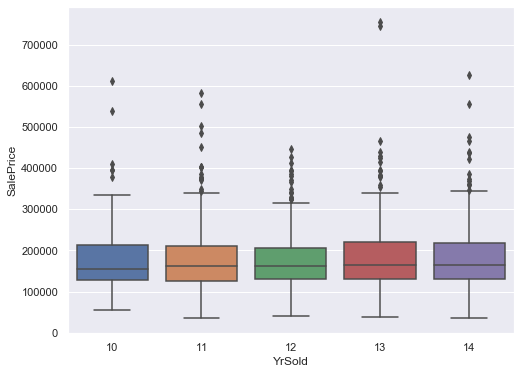

In [98]:
#Box Plotting for YrSold vs SalePrice:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='YrSold',y='SalePrice',data=house_pred)

In [99]:
#len(house_pred_num)
categorical_features = house_pred.select_dtypes(include = ["object"]).columns
numerical_features = house_pred.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
house_pred_num = house_pred[numerical_features]
house_pred_cat = house_pred[categorical_features]

Numerical features : 23
Categorical features : 40



 mu = 180708.94 and sigma = 79574.73



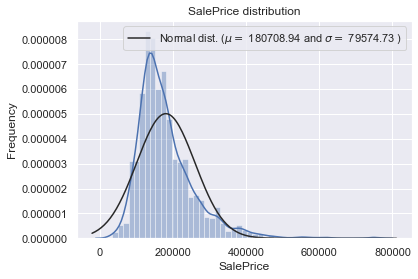

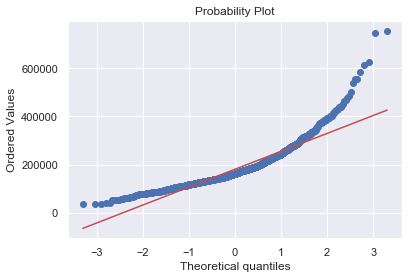

In [100]:
#SalePrice Normality check:
sns.distplot(house_pred['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_pred['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Probability Plot check for 'SalePrice'
fig = plt.figure()
res = stats.probplot(house_pred['SalePrice'], plot=plt)
plt.show()

<font color = Blue size = 5> Inference: </font>
> Target Feature: SalePrice have data skewness. 

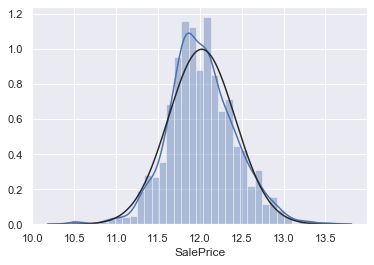

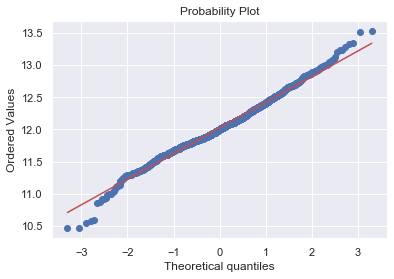

In [101]:
#After applying log Transformation Normality Check 
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
house_pred["SalePrice"] = np.log1p(house_pred["SalePrice"])
sns.distplot(house_pred.SalePrice, fit=norm);
fig = plt.figure()
#Probability Plot after applying log transformation:
res = stats.probplot(house_pred.SalePrice, plot=plt)

<font color = Blue size = 5> Inference: </font>
> The skew seems now corrected and the data appears more normally distributed.

In [102]:
#Checking any nulls in categorical:
str(house_pred_cat.isnull().values.sum())

'0'

In [103]:
#Packages To Import for modeling:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [104]:
#categorical_features for modeling:
categorical_features = house_pred.select_dtypes(include = ["object"]).columns
categorical_features

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [105]:
#numerical_features for modeling:
numerical_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

In [106]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
house_pred_catd = pd.get_dummies(house_pred[['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType',
       'SaleCondition']], drop_first=True)
house_pred_catd.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhoo

In [107]:
# house_pred_train is a combination of Dummy categorical features & Numerical features:
house_pred_train = pd.concat([house_pred_catd,house_pred_num],axis=1)
house_pred_train.shape

(1446, 260)

In [108]:
# house_pred_train features:
print(house_pred_train.columns)

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold'],
      dtype='object', length=260)


In [109]:
# Target feature:
y = house_pred['SalePrice']

In [110]:
#standardizing data
house_pred_scaled = StandardScaler().fit_transform(house_pred_train);
low_range = house_pred_scaled[house_pred_scaled[:,0].argsort()][:10]
high_range= house_pred_scaled[house_pred_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
  -0.13872766]
 [-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
  -0.13872766]
 [-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
  -1.64135082]
 ...
 [-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   0.61258392]
 [-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   1.3638955 ]
 [-0.22214158 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   0.61258392]]

outer range (high) of the distribution:
[[ 4.50163369 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   0.61258392]
 [ 4.50163369 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
  -0.89003924]
 [ 4.50163369 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
  -0.13872766]
 ...
 [ 4.50163369 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   1.3638955 ]
 [ 4.50163369 -0.05266807 -0.09147787 ... -0.06397357 -0.08736961
   0.61258392]
 [ 4.50163369 -0.0

In [111]:
# house_pred_train features:
house_pred_train.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhoo

In [112]:
#split the data to train & test for the model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(house_pred_train,y,test_size = 0.3,random_state= 0)


In [113]:
#Shape of Train & Test Data:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1012, 260), (434, 260), (1012,), (434,))

<font color= SkyBlue size = 5> Ridge and Lasso Regression</font>

> Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [114]:
from sklearn import metrics

In [115]:
def test(models,data,iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train,X_test,y_train,y_test = train_test_split(house_pred_train,y,test_size = 0.3,random_state= 0)
            r2_test.append(metrics.r2_score(y_test,models[i].fit(X_train,y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train,models[i].fit(X_train,y_train).predict(X_train)))
        results[i] = [np.mean(r2_train),np.mean(r2_test)]
    return pd.DataFrame(results)

In [116]:
models = { 'Lasso': linear_model.Lasso(),
           'Ridge': linear_model.Ridge(),
}

In [117]:
test(models,house_pred_train)

Lasso     Ridge
0  0.821932  0.947670
1  0.835035  0.907196

In [118]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,30.0, 40.0, 50.0,60.0,80.0,100.0,200.0,500.0,1000.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 80.0, 100.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [119]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08438436541954876


In [120]:
#cv_results 
alpha = 10.0
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=alpha]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005616      0.000609         0.001464        0.000141      0.0001   
1       0.005308      0.000559         0.001415        0.000065       0.001   
2       0.005397      0.000383         0.001510        0.000289        0.01   
3       0.005076      0.000393         0.001277        0.000150        0.05   
4       0.007243      0.001000         0.001858        0.000246         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.093344          -0.092685          -0.105229   
1   {'alpha': 0.001}          -0.093220          -0.092689          -0.105144   
2    {'alpha': 0.01}          -0.092242          -0.092688          -0.104403   
3    {'alpha': 0.05}          -0.090104          -0.092505          -0.102436   
4     {'alpha': 0.1}          -0.088908          -0.092244          -0.100936   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.106825          -0.087892        -0.097187        0.007465   
1          -0.106827          -0.087799        -0.097128        0.007483   
2          -0.106724          -0.087017        -0.096607        0.007604   
3          -0.105619          -0.085002        -0.095125        0.007716   
4          -0.104214          -0.083650        -0.093984        0.007591   

   rank_test_score  split0_train_score  split1_train_score  \
0               30           -0.059604           -0.060681   
1               29           -0.059629           -0.060693   
2               28           -0.059865           -0.060815   
3               27           -0.060421           -0.061215   
4               26           -0.060733           -0.061521   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.057464           -0.058426           -0.062995   
1           -0.057472           -0.058439           -0.063010   
2           -0.057549           -0.058556           -0.063146   
3           -0.057893           -0.058975           -0.063641   
4           -0.058244           -0.059403           -0.064079   

   mean_train_score  std_train_score  
0         -0.059834         0.001916  
1         -0.059848         0.001918  
2         -0.059986         0.001933  
3         -0.060429         0.001974  
4         -0.060796         0.001988

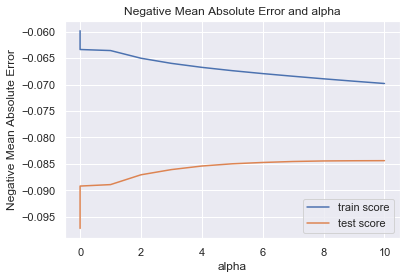

In [121]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [122]:
#Best Alpha:
alpha

10.0

In [123]:
#Ridge Fitting  
ridge = Ridge(alpha=alpha)
#Priting Ridge Regression Coefficients
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.93607923e-02,  8.50046421e-03,  1.22561031e-02,  7.03390435e-03,
       -1.03235588e-02,  5.08816638e-02,  1.33125839e-02,  4.86495587e-03,
       -8.74119646e-03, -2.09950348e-02, -2.90282900e-03, -7.01035289e-02,
        6.17249813e-03,  1.18438569e-03,  7.02920243e-02,  4.60007896e-02,
        7.07689356e-02,  2.65637162e-02,  1.25157440e-02, -7.49861582e-03,
       -2.17693270e-03,  2.24120703e-02, -9.61616578e-03, -6.91892545e-03,
       -7.39109598e-03, -4.99151881e-03,  1.02483707e-02,  2.13243028e-02,
        1.47766498e-02, -2.28609295e-02,  1.05441823e-01, -5.17349156e-02,
       -2.42566910e-02, -7.79329714e-02, -5.99595285e-02, -2.74926023e-02,
       -9.98496916e-03, -6.92043417e-03, -2.99630977e-02,  1.27483722e-02,
        4.47516019e-02, -1.15801284e-02,  4.62502622e-03, -2.33075619e-04,
       -8.23233583e-03,  3.86340159e-02,  9.01157228e-02, -3.08668051e-03,
        1.90681076e-02,  1.41228390e-02,  6.36325154e-02,  9.77268993e-04,
        1.04234423e-02, -

In [124]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08438436541954876


In [125]:
#predicting Ridge R2 scores:
from sklearn.metrics import r2_score
y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train,y_pred=y_train_pred) )
y_test_pred = ridge.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_true=y_test,y_pred=y_test_pred) )

R2 score of Training Data: 0.9372628149308648
R2 score of Testing Data: 0.9107818087014993


In [126]:
#To Print the Ridge Features & Coefficents initially:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_pred_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

Feature       coef
0            MSSubClass_30  11.028483
79         RoofStyle_Gable   0.116005
31    Neighborhood_Edwards   0.105442
47     Neighborhood_Timber   0.090116
202           Fireplaces_1   0.089317
77           OverallCond_2   0.084697
236  SaleCondition_Partial   0.073524
17             MSZoning_RM   0.070769
15             MSZoning_RH   0.070292
51         Condition1_PosA   0.063633

<font color = Blue size = 5>Inference: </font>
> The Significant Coefficents after double the alpha:

    MSSubClass_30
    RoofStyle_Gable
    Neighborhood_Edwards
    Neighborhood_Timber
    Fireplaces_1
    OverallCond_2
    SaleCondition_Partial
    MSZoning_RM
    MSZoning_RH
    Condition1_PosA

In [127]:
#Double the Alpha :
alpha = 2 * (model_cv.best_params_['alpha'])
ridge = Ridge(alpha=alpha)

#Fit Ridge model:
ridge.fit(X_train,y_train)

#predict:
y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred) )
y_test_pred = ridge.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test,y_test_pred) )

R2 score of Training Data: 0.931498670955386
R2 score of Testing Data: 0.9095890697153908


In [128]:
#To Print the Ridge Features & Coefficents after double the alpha:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_pred_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

Feature       coef
0            MSSubClass_30  11.069328
79         RoofStyle_Gable   0.102732
31    Neighborhood_Edwards   0.086766
202           Fireplaces_1   0.077784
77           OverallCond_2   0.076327
236  SaleCondition_Partial   0.063442
47     Neighborhood_Timber   0.061792
51         Condition1_PosA   0.052884
17             MSZoning_RM   0.052142
139        BsmtExposure_Mn   0.051108

<font color = Blue size = 5>Inference: </font>
> The Significant Coefficents after double the alpha:

    MSSubClass_30
    RoofStyle_Gable
    Neighborhood_Edwards
    Fireplaces_1
    OverallCond_2
    SaleCondition_Partial
    Neighborhood_Timber
    Condition1_PosA
    MSZoning_RM
    BsmtExposure_Mn
    
Only difference is : MSZoning_RH & BsmtExposure_Mn rest are just differed in weightage of co-efficients. 

In [129]:
#Lasso Regression Regularization:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#fit the Lasso regularization model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 80.0, 100.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [130]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.075068      0.024969         0.001263        0.000186      0.0001   
1       0.009028      0.000451         0.000913        0.000054       0.001   
2       0.004187      0.000290         0.000861        0.000042        0.01   
3       0.024006      0.005445         0.000948        0.000068        0.05   
4       0.017851      0.005898         0.000920        0.000043         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084157          -0.090639          -0.096803   
1   {'alpha': 0.001}          -0.079233          -0.091857          -0.090487   
2    {'alpha': 0.01}          -0.098194          -0.116011          -0.112105   
3    {'alpha': 0.05}          -0.102088          -0.119789          -0.117666   
4     {'alpha': 0.1}          -0.101677          -0.120282          -0.116890   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.092857          -0.077473        -0.088384        0.006820   
1          -0.085363          -0.081151        -0.085618        0.004971   
2          -0.107236          -0.104703        -0.107649        0.006139   
3          -0.111823          -0.109074        -0.112086        0.006324   
4          -0.110689          -0.108929        -0.111692        0.006484   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.063483           -0.063594   
1                1           -0.076185           -0.075685   
2                3           -0.105814           -0.102723   
3                7           -0.110489           -0.106954   
4                5           -0.110409           -0.106944   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.060809           -0.062711           -0.066671   
1           -0.074610           -0.076576           -0.077486   
2           -0.102999           -0.104992           -0.103752   
3           -0.107613           -0.109512           -0.109651   
4           -0.107735           -0.109520           -0.109753   

   mean_train_score  std_train_score  
0         -0.063454         0.001893  
1         -0.076108         0.000953  
2         -0.104056         0.001179  
3         -0.108844         0.001333  
4         -0.108872         0.001309

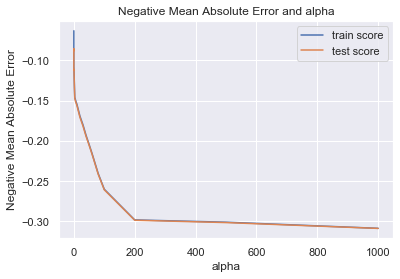

In [131]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='top right')
plt.show()

In [132]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08561772600087496


In [134]:
#Assiging the Best alpha:
alpha = 0.001

#Fitting the Lasso Model:
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
#predicting the r2 score for Train & Test set:
y_train_pred = lasso.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred) )
y_test_pred = lasso.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test,y_test_pred) )

R2 score of Training Data: 0.9248509925970583
R2 score of Testing Data: 0.9046643551135917


In [136]:
#Lasso coefficients:
lasso.coef_

array([-1.07673173e-02,  0.00000000e+00,  0.00000000e+00,  7.47901335e-03,
       -0.00000000e+00,  4.28156121e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.73608549e-02, -0.00000000e+00, -6.95856896e-02,
       -0.00000000e+00, -0.00000000e+00,  4.42122104e-02,  0.00000000e+00,
        4.28595992e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.03391629e-03,  7.18582957e-03, -0.00000000e+00, -0.00000000e+00,
       -2.83439239e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.20578415e-03,  1.21857336e-01, -2.75321634e-02,
       -0.00000000e+00, -7.94731989e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -8.36912622e-03,  0.00000000e+00,
        4.47494107e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.64907817e-02,  8.64485329e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.05988500e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [145]:
#Printing the Features & coefficents for the lasso model
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_pred_train.columns
cols.insert(0,'const')
lasso_coef= pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

Feature       coef
0            MSSubClass_30  11.053350
79         RoofStyle_Gable   0.128595
31    Neighborhood_Edwards   0.121857
230           SaleType_Oth   0.095524
202           Fireplaces_1   0.087938
47     Neighborhood_Timber   0.086449
77           OverallCond_2   0.083266
236  SaleCondition_Partial   0.067165
78           OverallCond_3   0.061777
139        BsmtExposure_Mn   0.057095

<font color = Blue size = 5>Inference: </font>
> The Significant Coefficents for Lasso:

    MSSubClass_30
    RoofStyle_Gable
    Neighborhood_Edwards
    SaleType_Oth
    Fireplaces_1
    Neighborhood_Timber
    OverallCond_2
    SaleCondition_Partial
    OverallCond_3
    BsmtExposure_Mn
    
Only difference from Ridge is :  SaleType_Oth & OverallCond_3 rest. 

In [146]:
#Double the Alpha :
alpha = 2 * 0.001
#Fit the Lasso Model:
lasso1 = Lasso(alpha=alpha)      
lasso1.fit(X_train, y_train)


Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
#predict for double alpha:
y_train_pred = lasso1.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred) )
y_test_pred = lasso1.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test,y_test_pred) )

R2 score of Training Data: 0.9108799193920121
R2 score of Testing Data: 0.8974002627735937


In [148]:
#Lasso coefficients for Double Alpha:
lasso1.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.30693273e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.86562893e-02,
       -0.00000000e+00, -0.00000000e+00,  9.03333520e-03,  0.00000000e+00,
        3.33979169e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.48547973e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.10067226e-01, -3.50610315e-03,
       -0.00000000e+00, -3.64788903e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.67829610e-04, -0.00000000e+00,
        2.62190869e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.83884006e-02,  2.01813448e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.24207571e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [149]:
#Lasso Features & coefficients for Double Alpha:
model_param = list(lasso1.coef_)
model_param.insert(0,lasso1.intercept_)
cols = house_pred_train.columns
cols.insert(0,'const')
lasso1_coef= pd.DataFrame(list(zip(cols,model_param)))
lasso1_coef.columns = ['Feature','coef']
lasso1_coef.sort_values(by='coef',ascending=False).head(10)

Feature       coef
0            MSSubClass_30  11.090480
31    Neighborhood_Edwards   0.110067
79         RoofStyle_Gable   0.104186
230           SaleType_Oth   0.085125
202           Fireplaces_1   0.081233
77           OverallCond_2   0.066419
139        BsmtExposure_Mn   0.042450
51         Condition1_PosA   0.042421
236  SaleCondition_Partial   0.042287
204           Fireplaces_3   0.037782

<font color = Blue size = 5>Inference: </font>
> The Significant Features for double alpha@ Lasso:

    MSSubClass_30
    Neighborhood_Edwards
    RoofStyle_Gable
    SaleType_Oth
    Fireplaces_1
    OverallCod_2
    BsmtExposure_Mn
    Condition1_PosA
    SaleCondition_Partial
    Fireplaces_3
    
    
Only difference from Lasso is : Fireplaces_3. 

In [150]:
#Dropping the top 5 features from the single Lasso is:
var = ['MSSubClass_30','RoofStyle_Gable','Neighborhood_Edwards','SaleType_Oth','Fireplaces_1']
X_train.drop(var,axis=1,inplace=True)
X_test.drop(var,axis=1,inplace=True )

In [151]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#fit the lasso model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   30.0, 40.0, 50.0, 60.0, 80.0, 100.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [152]:
#fit the model for rest of top5:
alpha = 0.001
lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
#predicting r2 values for both Train & Test for rest of top5:
y_train_pred = lasso2.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred) )
y_test_pred = lasso2.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test,y_test_pred) )

R2 score of Training Data: 0.9235316005176193
R2 score of Testing Data: 0.9033552225296068


In [154]:
#Coefficients for rest of top5:
lasso2.coef_

array([ 0.00000000e+00,  0.00000000e+00,  7.24897077e-03, -0.00000000e+00,
        4.14967456e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.88505467e-02,  0.00000000e+00, -7.69564339e-02, -0.00000000e+00,
       -0.00000000e+00,  3.65014272e-02,  0.00000000e+00,  4.10542037e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.50520873e-03,
        5.16178931e-03, -0.00000000e+00, -0.00000000e+00, -2.43246042e-03,
        0.00000000e+00,  0.00000000e+00,  3.74649899e-03,  0.00000000e+00,
       -8.21567831e-03,  1.31839089e-01, -0.00000000e+00, -7.64656439e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -5.96301345e-03,  0.00000000e+00,  5.11848777e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  4.06024650e-02,
        9.47328734e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.93637812e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [155]:
#Printing the features & coefficients for rest of top5 from lasso:
model_param = list(lasso2.coef_)
model_param.insert(0,lasso2.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso2_coef= pd.DataFrame(list(zip(cols,model_param)))
lasso2_coef.columns = ['Feature','coef']
lasso2_coef.sort_values(by='coef',ascending=False).head(10)

Feature       coef
0            MSSubClass_40  11.034627
30    Neighborhood_Gilbert   0.131839
77       RoofStyle_Gambrel   0.129033
226            SaleType_WD   0.099042
45     Neighborhood_Timber   0.094733
75           OverallCond_2   0.091893
199           Fireplaces_2   0.089268
231  SaleCondition_Partial   0.070037
76           OverallCond_3   0.062264
136        BsmtExposure_Mn   0.059123

<font color = Skyblue size = 5> Inference: </font>
<br>
None of these columns were populated after removing top 5: ['MSSubClass_30','RoofStyle_Gable','Neighborhood_Edwards','SaleType_Oth','Fireplaces_1']
But where as the existing features like 'Neighborhood_Timber' climbed into top 5 the relative FirePlaces_2 dropped.

Now the Most Significant 5 features are:

'MSSubClass_30','RoofStyle_Gable','Neighborhood_Edwards','SaleType_WD','Neighborhood_Timber'